<a href="https://colab.research.google.com/github/xavierjacomep/marketing-basado-en-datos/blob/main/segmentacion-clientes/Marketing_basado_en_datos_Caso_Segmentacion_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Personalidad del Cliente
## Caso práctico sobre Segmentación de Clientes
---

**Asignatura:** Marketing basado en datos

**Autor:** Xavier Jácome Piñeiros, MSc.

---

## Contexto

El **Análisis de Personalidad del Cliente** es una técnica que permite comprender en profundidad las características, comportamientos y preferencias de los clientes de una empresa. Esta comprensión es esencial para diseñar estrategias de marketing personalizadas, adaptar productos y servicios a segmentos específicos, y optimizar los recursos comerciales.

En lugar de realizar campañas generalizadas para todos los clientes, las empresas pueden **identificar los segmentos más propensos a comprar** ciertos productos y dirigir los esfuerzos de marketing exclusivamente hacia esos grupos, aumentando la efectividad y reduciendo costos.

---

## Planteamiento del Problema

**Nombre de la empresa:** *Delizia Market*  
**Sector:** Retail - supermercado premium con canales físicos, online y catálogo

---

### 🧩 Escenario a resolver por el científico de datos

*Delizia Market* es una cadena de supermercados de productos gourmet con presencia en tiendas físicas y un e-commerce consolidado. En los reportes comerciales recientes se detectaron varios desafíos:

- Alta **desigualdad en los niveles de gasto** entre sus clientes.
- Bajo **retorno en campañas promocionales generalizadas**.
- Pérdida de clientes premium que no se sienten bien atendidos.
- Campañas efectivas en un canal (ej. catálogo) no tienen impacto en otros.

---

### 💼 Necesidad del negocio

La gerencia de marketing y fidelización solicita al equipo de ciencia de datos un análisis profundo de la **personalidad comercial de sus clientes**, con el fin de:

1. **Descubrir segmentos naturales** de clientes según su perfil sociodemográfico, patrones de compra y respuesta a campañas anteriores.
2. **Entender los hábitos por canal** (web, catálogo, tienda física).
3. **Diseñar estrategias personalizadas** por tipo de cliente (por ejemplo: más digitales, más sensibles al precio, más gourmet).
4. **Reducir el desgaste del presupuesto publicitario**, orientando promociones solo a los segmentos con alta receptividad.
5. **Mejorar la retención** de los clientes más valiosos, adaptando las acciones según su sensibilidad al canal, producto o frecuencia de compra.

---

### 🧪 Rol del Científico de Datos

Tu rol es desarrollar un **modelo de clustering no supervisado** que agrupe a los clientes en segmentos significativos, utilizando información de:

- Perfil sociodemográfico (edad, ingreso, educación, estructura familiar).
- Comportamiento de compra por tipo de producto.
- Participación en campañas anteriores.
- Canales utilizados y frecuencia de visitas.
- Recencia y antigüedad como cliente.

---

A partir del análisis, deberás generar insights que permitan crear fichas por segmento y responder preguntas como:

- ¿Quiénes son nuestros clientes silenciosos pero leales?
- ¿Qué segmento es más sensible a campañas por catálogo?
- ¿Qué grupo combina alto gasto con bajo engagement digital?
- ¿Qué tipo de cliente deberíamos dejar de invertir en campañas?


Finalmente, deberás **recomendar estrategias diferenciadas** basadas en los perfiles encontrados para aumentar la efectividad del marketing y la fidelización.

---

## Contenido del Dataset

El conjunto de datos incluye información sobre personas, comportamiento de compra, participación en campañas promocionales y canales utilizados. Las variables están agrupadas de la siguiente manera:

### 👥 Personas
- `ID`: Identificador único del cliente.
- `Year_Birth`: Año de nacimiento.
- `Education`: Nivel educativo.
- `Marital_Status`: Estado civil.
- `Income`: Ingreso anual del hogar.
- `Kidhome`: Número de niños en el hogar.
- `Teenhome`: Número de adolescentes en el hogar.
- `Dt_Customer`: Fecha de registro con la empresa.
- `Recency`: Días desde la última compra.
- `Complain`: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario.

### 🛒 Productos (gasto en los últimos 2 años)
- `MntWines`: Vinos
- `MntFruits`: Frutas
- `MntMeatProducts`: Carnes
- `MntFishProducts`: Pescados
- `MntSweetProducts`: Dulces
- `MntGoldProds`: Productos de oro

### 📣 Promociones y campañas
- `NumDealsPurchases`: Compras realizadas con descuento.
- `AcceptedCmp1` a `AcceptedCmp5`: 1 si aceptó la campaña N, 0 en caso contrario.
- `Response`: 1 si aceptó la última campaña, 0 en caso contrario.

### 📍 Canal de compra
- `NumWebPurchases`: Compras en el sitio web.
- `NumCatalogPurchases`: Compras vía catálogo.
- `NumStorePurchases`: Compras en tienda física.
- `NumWebVisitsMonth`: Visitas al sitio web el último mes.

---

## Variable Objetivo

El proyecto no incluye una variable objetivo supervisada. El objetivo es aplicar **algoritmos de clustering** no supervisado para agrupar clientes en segmentos representativos según sus características y comportamiento, con el fin de facilitar la toma de decisiones comerciales basadas en datos.

---



### 1. Carga y comprensión del dataset
- Importación de librerías necesarias.
- Carga del dataset original en formato `.csv`.
- Exploración inicial de los datos para conocer su estructura y contenido.
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#### Carga y preparación del dataset

##### Carga manual desde Google Colab

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#df = pd.read_csv('marketing_campaign.csv')
#df.head()

##### Carga desde repositorio Github

In [ ]:
# 1. Cargar los datos
df = pd.read_csv("https://raw.githubusercontent.com/xavierjacomep/marketing-basado-en-datos/refs/heads/main/segmentacion-clientes/marketing_campaign.csv", sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.000        0         0   
1  2174        1954  Graduation         Single 46344.000        1         1   
2  4141        1965  Graduation       Together 71613.000        0         0   
3  6182        1984  Graduation       Together 26646.000        1         0   
4  5324        1981         PhD        Married 58293.000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [ ]:
print(df['ID'].nunique())
print(len(df))

2240
2240


En esta sección se cargan los datos originales del archivo CSV. Es fundamental inspeccionar rápidamente el contenido para entender su estructura y confirmar que las columnas relevantes estén presentes. También se verifica el separador adecuado (`sep='\t'`), pues el dataset tiene formato TSV.

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### 2. Limpieza de datos
- Eliminación de registros con valores nulos (especialmente en `Income`).
- Conversión de la fecha de registro (`Dt_Customer`) al tipo datetime.
- Detección y eliminación de valores atípicos extremos en `Income` y `Age`.
---

In [ ]:
# 2. Limpieza de datos

df_original = df.copy()

df.dropna(subset=['Income'], inplace=True)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

### 3. Ingeniería de características
Se generaron nuevas variables relevantes para enriquecer el análisis:
- `Customer_For`: Días como cliente.
- `Age`: Edad actual estimada.
- `Spent`: Gasto total en productos.
- `Spent`: Valor de vida del cliente (basado en `Spent`).
- `Purchase_Frequency`: Frecuencia aproximada de compra.
- `Web_Engagement`: Interacción digital con la empresa.
- `Family_Size`, `Is_Parent`, `Living_With`, entre otras.
---

In [ ]:
# 3. Feature Engineering
df["Customer_For"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

# Edad al corte de 2021
df["Age"] = 2021 - df["Year_Birth"]

# Gasto total de varios ítems
df["Spent"] = df[["MntWines", "MntFruits", "MntMeatProducts",
                  "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)

# Ajuste a "Solo" para ciertos estatus
df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner", "Together": "Partner", "Single": "Alone",
    "Divorced": "Alone", "Widow": "Alone", "YOLO": "Alone", "Absurd": "Alone"
})

# Característica que indica el total de hijos viviendo en la casa
df["Children"] = df["Kidhome"] + df["Teenhome"]

# Característica que indica el total de miembros de la familia
df["Family_Size"] = df["Living_With"].map({"Alone": 1, "Partner": 2}) + df["Children"]

# Característica que indica paternidad
df["Is_Parent"] = (df["Children"] > 0).astype(int)

# Característica que indica el nivel de educación
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate", "2n Cycle": "Undergraduate",
    "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"
})

# Ajuste de nombres para mayor claridad
df.rename(columns={"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat",
                   "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"}, inplace=True)

# Nuevas variables sugeridas
df["Purchase_Frequency"] = (df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]) / (df["Customer_For"] / 30 + 1)
df["Web_Engagement"] = df["NumWebPurchases"] + df["NumWebVisitsMonth"]

# Eliminar características redundantes
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
df = df.drop(to_drop, axis=1)
df.head()

ID     Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
0  5524      Graduate 58138.000        0         0       58    635      88   
1  2174      Graduate 46344.000        1         1       38     11       1   
2  4141      Graduate 71613.000        0         0       26    426      49   
3  6182      Graduate 26646.000        1         0       26     11       4   
4  5324  Postgraduate 58293.000        1         0       94    173      43   

   Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0   546   172      88    88                  3                8   
1     6     2       1     6                  2                1   
2   127   111      21    42                  1                8   
3    20    10       3     5                  2                2   
4   118    46      27    15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Customer_For  Age  Spent Living_With  Children  Family_Size  Is_Parent  \
0           663   64   1617       Alone         0            1          0   
1           113   67     27       Alone         2            3          1   
2           312   56    776     Partner         0            2          0   
3           139   37     53     Partner         1            3          1   
4           161   40    422     Partner         1            3          1   

   Purchase_Frequency  Web_Engagement  
0               0.952              15  
1               0.839               6  
2               1.754              12  
3               1.065               8  
4               2.199              10

En la celda previa se crean nuevas variables derivadas con el objetivo de enriquecer el análisis y capturar dimensiones relevantes del comportamiento y perfil de los clientes:

- **Customer_For**: número de días que el cliente lleva en la empresa, medido desde su fecha de ingreso hasta la fecha más reciente del dataset. Es una medida de **antigüedad del cliente**.
  
- **Age**: edad actual del cliente al año 2021. Es un indicador demográfico fundamental para segmentaciones.
  
- **Spent**: suma total del gasto del cliente en todas las categorías de productos (vino, frutas, carnes, pescado, dulces y oro). Refleja el **consumo total acumulado**.
  
- **Living_With**: simplifica el estado civil agrupando en dos categorías: "Partner" para convivientes o casados, y "Alone" para solteros, viudos o divorciados. Busca representar el **tipo de convivencia** en el hogar.
  
- **Children**: suma de niños y adolescentes en el hogar. Indica el **número de hijos dependientes**.
  
- **Family_Size**: total de miembros que viven en el hogar, incluyendo al cliente y su pareja (si aplica) más los hijos. Refleja el **tamaño del hogar**.
  
- **Is_Parent**: variable binaria (0/1) que indica si el cliente tiene hijos. Se utiliza como señal de **responsabilidades familiares**.
  
- **Education**: se recodifica el nivel educativo en tres grupos: "Undergraduate", "Graduate" y "Postgraduate", simplificando los niveles para análisis más consistentes.
  
- **Purchase_Frequency**: mide la frecuencia de compra mensual promedio del cliente, calculada como el total de compras dividido por su tiempo como cliente (en meses). Captura la **intensidad de compra** ajustada por el tiempo.
  
- **Web_Engagement**: suma del número de compras en la web y las visitas mensuales. Representa el **grado de interacción digital** del cliente.

Estas transformaciones permiten extraer información más significativa y utilizable para el clustering y análisis posterior.


### 4. Análisis Exploratorio de Datos (EDA)

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

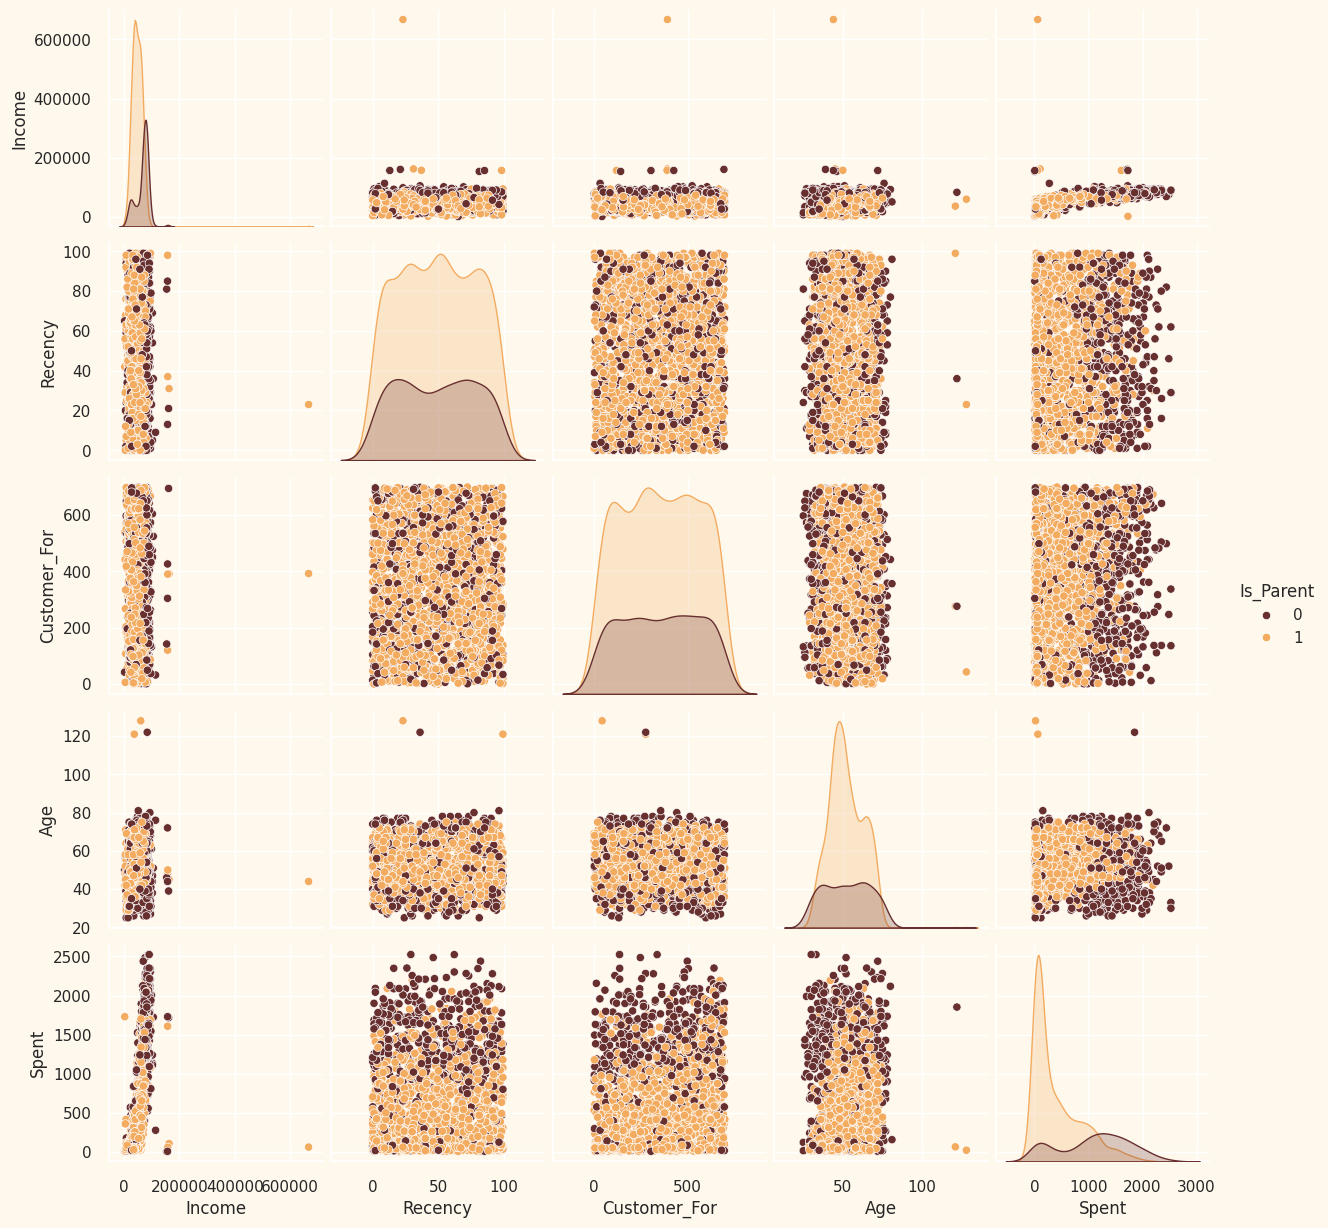

In [ ]:
#Configuración de preferencias de colores
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Graficando las siguientes características
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))

plt.show()

Este gráfico de pares muestra las relaciones entre variables numéricas clave (`Income`, `Recency`, `Customer_For`, `Age`, `Spent`) diferenciando entre clientes que son padres (`Is_Parent = 1`) y los que no (`Is_Parent = 0`).

#### Comentarios relevantes:

- **Income vs. Spent**: se observa una relación visualmente positiva, aunque débil. Muchos padres (`Is_Parent = 1`) presentan niveles de gasto bajos incluso con ingresos moderados, lo que podría indicar mayor cautela en el consumo.

- **Recency** (días desde la última compra) muestra distribuciones similares entre ambos grupos, sin diferencias significativas a simple vista.

- **Customer_For** y **Age**: puede haber una coincidencia visual entre clientes con mayor antigüedad y mayor edad, aunque no es necesariamente causal. Los padres parecen estar en un rango de edad levemente mayor.

- **Spent**: los no padres (`Is_Parent = 0`) muestran una mayor dispersión hacia altos niveles de gasto total, lo que sugiere mayor capacidad de gasto discrecional.

- **Distribuciones individuales**: en `Income` y `Spent`, los no padres presentan colas más extendidas, indicando que hay más casos extremos de alto ingreso y alto gasto entre quienes no tienen hijos.

Esta visualización es útil para identificar cómo la estructura familiar puede influir en el comportamiento de compra, y puede apoyar la segmentación en estrategias de marketing personalizadas.

In [ ]:
df.drop(columns='ID').describe()

Income  Kidhome  Teenhome  Recency    Wines   Fruits     Meat  \
count   2216.000 2216.000  2216.000 2216.000 2216.000 2216.000 2216.000   
mean   52247.251    0.442     0.505   49.013  305.092   26.356  166.996   
std    25173.077    0.537     0.544   28.948  337.328   39.794  224.283   
min     1730.000    0.000     0.000    0.000    0.000    0.000    0.000   
25%    35303.000    0.000     0.000   24.000   24.000    2.000   16.000   
50%    51381.500    0.000     0.000   49.000  174.500    8.000   68.000   
75%    68522.000    1.000     1.000   74.000  505.000   33.000  232.250   
max   666666.000    2.000     2.000   99.000 1493.000  199.000 1725.000   

          Fish   Sweets     Gold  NumDealsPurchases  NumWebPurchases  \
count 2216.000 2216.000 2216.000           2216.000         2216.000   
mean    37.638   27.029   43.965              2.324            4.085   
std     54.752   41.072   51.815              1.924            2.741   
min      0.000    0.000    0.000              0.000            0.000   
25%      3.000    1.000    9.000              1.000            2.000   
50%     12.000    8.000   24.500              2.000            4.000   
75%     50.000   33.000   56.000              3.000            6.000   
max    259.000  262.000  321.000             15.000           27.000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count             2216.000           2216.000           2216.000   
mean                 2.671              5.801              5.319   
std                  2.927              3.251              2.425   
min                  0.000              0.000              0.000   
25%                  0.000              3.000              3.000   
50%                  2.000              5.000              6.000   
75%                  4.000              8.000              7.000   
max                 28.000             13.000             20.000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count      2216.000      2216.000      2216.000      2216.000      2216.000   
mean          0.074         0.074         0.073         0.064         0.014   
std           0.261         0.262         0.260         0.245         0.116   
min           0.000         0.000         0.000         0.000         0.000   
25%           0.000         0.000         0.000         0.000         0.000   
50%           0.000         0.000         0.000         0.000         0.000   
75%           0.000         0.000         0.000         0.000         0.000   
max           1.000         1.000         1.000         1.000         1.000   

       Complain  Response  Customer_For      Age    Spent  Children  \
count  2216.000  2216.000      2216.000 2216.000 2216.000  2216.000   
mean      0.009     0.150       353.521   52.180  607.075     0.947   
std       0.097     0.357       202.435   11.986  602.900     0.749   
min       0.000     0.000         0.000   25.000    5.000     0.000   
25%       0.000     0.000       180.000   44.000   69.000     0.000   
50%       0.000     0.000       355.500   51.000  396.500     1.000   
75%       0.000     0.000       529.000   62.000 1048.000     1.000   
max       1.000     1.000       699.000  128.000 2525.000     3.000   

       Family_Size  Is_Parent  Purchase_Frequency  Web_Engagement  
count     2216.000   2216.000            2216.000        2216.000  
mean         2.593      0.714               1.566           9.404  
std          0.906      0.452               2.044           3.566  
min          1.000      0.000               0.000           0.000  
25%          2.000      0.000               0.533           7.000  
50%          3.000      1.000               0.994           9.000  
75%          3.000      1.000               1.674          11.000  
max          5.000      1.000              22.500          28.000

### Análisis descriptivo del dataset

El resumen de estadísticas descriptivas revela la estructura general del comportamiento de los clientes:

#### 💰 Variables económicas y de gasto:
- **Income**: el ingreso promedio es de \$52,247, pero con una desviación estándar alta (\$25,173) y un máximo atípico de \$666,666, lo que indica posibles *outliers* que deben considerarse en el análisis.
- **Spent**: el gasto total promedio es de \$607, con un rango muy amplio (mínimo de \$5 y máximo de \$2525), lo que evidencia distintos niveles de consumo entre los clientes.

#### 🛍️ Variables de comportamiento de compra:
- **Purchase_Frequency**: en promedio, los clientes realizan 1.56 compras mensuales desde que se unieron a la empresa. Algunos llegan hasta 22.5 compras/mes, lo que destaca un grupo de alto valor.
- **NumWebPurchases**, **NumCatalogPurchases**, **NumStorePurchases**: la tienda física sigue siendo el canal más usado (mediana de 5), aunque hay clientes muy activos por catálogo (hasta 28 compras).
- **Web_Engagement**: los clientes tienen en promedio 9.4 interacciones mensuales en la web (sumando visitas y compras), lo que refleja un segmento con fuerte presencia digital.

#### 👨‍👩‍👧‍👦 Variables familiares:
- **Children**: la mayoría de los clientes no tiene hijos (media de 0.95), con un máximo de 3.
- **Family_Size**: el tamaño promedio del hogar es de 2.6 personas, llegando hasta 5, lo que permite distinguir entre hogares individuales y familias numerosas.
- **Is_Parent**: alrededor del 71% de los clientes tiene hijos (media = 0.714), lo que permite segmentar por responsabilidad familiar.

#### 🎯 Variables relacionadas con campañas:
- Las tasas de aceptación de campañas (`AcceptedCmp1` a `AcceptedCmp5`, `Response`) son muy bajas (<10%), con una media cercana al 7%. Esto sugiere que podrían mejorarse mediante una segmentación más precisa o estrategias personalizadas.

#### 📅 Variables temporales:
- **Recency**: el número de días desde la última compra tiene un promedio de 49, con una distribución uniforme entre 0 y 99 días.
- **Customer_For**: los clientes tienen en promedio 353 días de antigüedad como clientes, lo que puede aprovecharse para análisis de retención o fidelidad.

---

**Conclusión**:  
Este análisis confirma que el dataset presenta alta variabilidad en consumo, ingresos, interacción digital y estructura familiar. Estas diferencias justifican la aplicación de técnicas de segmentación como clustering para identificar grupos de clientes con patrones homogéneos y diseñar estrategias diferenciadas por segmento.


#### Identificación de outliers

In [ ]:
def find_univariate_outliers_iqr(df, column, threshold=2.5):
  """
  Calcula los valores atípicos univariables utilizando el método IQR (Rango Intercuartílico).

  Args:
    df (pd.DataFrame): El DataFrame de entrada.
    column (str): El nombre de la columna en la que buscar valores atípicos.
    threshold (float): El umbral del IQR (por defecto es 1.5).

  Returns:
    pd.DataFrame: Un DataFrame que contiene los valores atípicos encontrados.
  """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - threshold * IQR
  upper_bound = Q3 + threshold * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  print('lower_bound', lower_bound)
  print('upper_bound', upper_bound)
  return outliers

# Ejemplo de uso: encontrar valores atípicos en la columna 'Income'
outliers_income = find_univariate_outliers_iqr(df.drop(columns='ID'), 'Income')
print("Valores atípicos encontrados en 'Income' (método IQR):")
display(outliers_income)

lower_bound -47744.5
upper_bound 151569.5
Valores atípicos encontrados en 'Income' (método IQR):


Education     Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
164   Postgraduate 157243.000        0         1       98     20       2   
617   Postgraduate 162397.000        1         1       31     85       1   
655       Graduate 153924.000        0         0       81      1       1   
687   Postgraduate 160803.000        0         0       21     55      16   
1300  Postgraduate 157733.000        1         0       37     39       1   
1653      Graduate 157146.000        0         0       13      1       0   
2132  Postgraduate 156924.000        0         0       85      2       1   
2233      Graduate 666666.000        1         0       23      9      14   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
164   1582     1       2     1                 15                0   
617     16     2       1     2                  0                0   
655      1     1       1     1                  0                0   
687   1622    17       3     4                 15                0   
1300     9     2       0     8                  0                1   
1653  1725     2       1     1                  0                0   
2132     2     1       1     1                  0                0   
2233    18     8       1    12                  4                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
164                    22                  0                  0             0   
617                     0                  1                  1             0   
655                     0                  0                  0             0   
687                    28                  1                  0             0   
1300                    0                  1                  1             0   
1653                   28                  0                  1             0   
2132                    0                  0                  0             0   
2233                    1                  3                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
164              0             0             0             0         0   
617              0             0             0             0         0   
655              0             0             0             0         0   
687              0             0             0             0         0   
1300             0             0             0             0         0   
1653             0             0             0             0         0   
2132             0             0             0             0         0   
2233             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
164          0           120   48   1608     Partner         1            3   
617          0           391   45    107     Partner         2            4   
655          0           142   46      6       Alone         0            1   
687          0           694   39   1717     Partner         0            2   
1300         0           390   50     59     Partner         1            3   
1653         0           426   44   1730     Partner         0            2   
2132         0           304   72      8     Partner         0            2   
2233         0           392   44     62     Partner         1            3   

      Is_Parent  Purchase_Frequency  Web_Engagement  
164           1               4.400               0  
617           1               0.071               1  
655           0               0.000               0  
687           0               1.202               0  
1300          1               0.143               2  
1653          0               1.842               1  
2132          0               0.000               0  
2233          1               0.498               9

In [ ]:
# Obtener las columnas numéricas
numerical_cols = df.drop(columns='ID').select_dtypes(include=np.number).columns.tolist()

# Iterar sobre las columnas numéricas y encontrar valores atípicos
for col in numerical_cols:
    print(f"\nValores atípicos encontrados en '{col}' (método IQR):")
    outliers = find_univariate_outliers_iqr(df.drop(columns='ID'), col)
    display(outliers)


Valores atípicos encontrados en 'Income' (método IQR):
lower_bound -47744.5
upper_bound 151569.5


Education     Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
164   Postgraduate 157243.000        0         1       98     20       2   
617   Postgraduate 162397.000        1         1       31     85       1   
655       Graduate 153924.000        0         0       81      1       1   
687   Postgraduate 160803.000        0         0       21     55      16   
1300  Postgraduate 157733.000        1         0       37     39       1   
1653      Graduate 157146.000        0         0       13      1       0   
2132  Postgraduate 156924.000        0         0       85      2       1   
2233      Graduate 666666.000        1         0       23      9      14   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
164   1582     1       2     1                 15                0   
617     16     2       1     2                  0                0   
655      1     1       1     1                  0                0   
687   1622    17       3     4                 15                0   
1300     9     2       0     8                  0                1   
1653  1725     2       1     1                  0                0   
2132     2     1       1     1                  0                0   
2233    18     8       1    12                  4                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
164                    22                  0                  0             0   
617                     0                  1                  1             0   
655                     0                  0                  0             0   
687                    28                  1                  0             0   
1300                    0                  1                  1             0   
1653                   28                  0                  1             0   
2132                    0                  0                  0             0   
2233                    1                  3                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
164              0             0             0             0         0   
617              0             0             0             0         0   
655              0             0             0             0         0   
687              0             0             0             0         0   
1300             0             0             0             0         0   
1653             0             0             0             0         0   
2132             0             0             0             0         0   
2233             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
164          0           120   48   1608     Partner         1            3   
617          0           391   45    107     Partner         2            4   
655          0           142   46      6       Alone         0            1   
687          0           694   39   1717     Partner         0            2   
1300         0           390   50     59     Partner         1            3   
1653         0           426   44   1730     Partner         0            2   
2132         0           304   72      8     Partner         0            2   
2233         0           392   44     62     Partner         1            3   

      Is_Parent  Purchase_Frequency  Web_Engagement  
164           1               4.400               0  
617           1               0.071               1  
655           0               0.000               0  
687           0               1.202               0  
1300          1               0.143               2  
1653          0               1.842               1  
2132          0               0.000               0  
2233          1               0.498               9


Valores atípicos encontrados en 'Kidhome' (método IQR):
lower_bound -2.5
upper_bound 3.5


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'Teenhome' (método IQR):
lower_bound -2.5
upper_bound 3.5


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'Recency' (método IQR):
lower_bound -101.0
upper_bound 199.0


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'Wines' (método IQR):
lower_bound -1178.5
upper_bound 1707.5


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'Fruits' (método IQR):
lower_bound -75.5
upper_bound 110.5


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
45        Graduate 79941.000        0         0       72    123     164   266   
53        Graduate 82582.000        0         0       54    510     120   550   
76    Postgraduate 75251.000        0         0       34    721     111   925   
102       Graduate 85693.000        0         1       59    386     172   183   
109   Postgraduate 89058.000        0         0       18    454     194   106   
...            ...       ...      ...       ...      ...    ...     ...   ...   
2172      Graduate 60934.000        0         1       41    224     155   155   
2185      Graduate 67716.000        0         1        8    530     142   217   
2203      Graduate 73807.000        0         1       88    366     124   156   
2206      Graduate 61014.000        0         1       17    269     129   495   
2217  Postgraduate 82032.000        0         0       54    332     194   377   

      Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
45     227      30   174                  1                2   
53     156      40   241                  1                4   
76      97      18    18                  1                7   
102    185     132   111                  2                9   
109     31      22    43                  1                5   
...    ...     ...   ...                ...              ...   
2172   192      93    54                  2                6   
2185    62       9    56                  4                7   
2203    71      78    54                  2                5   
2206   182      43    29                  4                9   
2217   149     125    57                  0                4   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
45                      4                  9                  1             0   
53                      9                  7                  1             1   
76                      6                  5                  5             0   
102                     5                 11                  5             0   
109                     4                  4                  2             0   
...                   ...                ...                ...           ...   
2172                    4                 11                  4             0   
2185                    4                 13                  5             0   
2203                    5                 11                  2             0   
2206                    3                  4                  7             0   
2217                    6                  7                  1             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
45               0             0             0             0         0   
53               0             0             1             0         0   
76               0             0             0             0         0   
102              0             0             0             0         0   
109              0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2172             0             0             0             0         0   
2185             1             0             0             0         0   
2203             0             0             0             0         0   
2206             0             0             0             0         0   
2217             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
45           0             1   45    984       Alone         0            1   
53           1            22   44   1617       Alone         0            1   
76           1           671   49   1890     Partner         0            2   
102          0           435   42   1169     Partner         1            3   
109       


Valores atípicos encontrados en 'Meat' (método IQR):
lower_bound -524.625
upper_bound 772.875


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
21         Graduate  2447.000        1         0       42      1       1   
29     Postgraduate 84618.000        0         0       96    684     100   
51     Postgraduate 79143.000        0         0        2    650      37   
76     Postgraduate 75251.000        0         0       34    721     111   
77         Graduate 75825.000        0         0       40   1032     105   
...             ...       ...      ...       ...      ...    ...     ...   
2131   Postgraduate 72309.000        0         0       64    960       0   
2151       Graduate 69209.000        0         0        4    496      32   
2167   Postgraduate 91172.000        0         0       94    162      28   
2193  Undergraduate 82347.000        0         0       38    556      54   
2211       Graduate 88325.000        0         0       42    519      71   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
21    1725     1       1     1                 15                0   
29     801    21      66     0                  1                6   
51     780    27     167    32                  1                6   
76     925    97      18    18                  1                7   
77     779   137     105    51                  0                5   
...    ...   ...     ...   ...                ...              ...   
2131   883    50      38     0                  1                5   
2151   849   229      48   128                  2                5   
2167   818     0      28    56                  0                4   
2193   845   202     133    63                  1                7   
2211   860    93      27    53                  1                6   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
21                     28                  0                  1             0   
29                      9                 10                  2             0   
51                      9                 13                  3             0   
76                      6                  5                  5             0   
77                      8                  9                  4             1   
...                   ...                ...                ...           ...   
2131                    6                  8                  3             0   
2151                    3                  6                  4             0   
2167                    3                  7                  3             1   
2193                    7                 10                  3             1   
2211                    2                  9                  2             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
21               0             0             0             0         0   
29               0             1             0             0         0   
51               0             0             0             0         0   
76               0             0             0             0         0   
77               0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2131             0             0             1             0         0   
2151             0             0             1             0         0   
2167             0             1             1             1         0   
2193             0             0             1             0         0   
2211             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
21           0           539   42   1730     Partner         1            3   
29           0           219   56   1672     Partner         0            2   
51           0           687   57   1693     Partner         0            2   
76           1           671   49   1890     Partner         0            2   


Valores atípicos encontrados en 'Fish' (método IQR):
lower_bound -114.5
upper_bound 167.5


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
0          Graduate 58138.000        0         0       58    635      88   
12         Graduate 63033.000        0         0       82    194      61   
45         Graduate 79941.000        0         0       72    123     164   
55     Postgraduate 82384.000        0         0       55    984      51   
67    Undergraduate 88194.000        0         1       19    688      14   
...             ...       ...      ...       ...      ...    ...     ...   
2175   Postgraduate 79174.000        0         0        2   1074      37   
2176   Postgraduate 81380.000        0         0       51    741      68   
2188   Postgraduate 65487.000        0         0       48    240      67   
2193  Undergraduate 82347.000        0         0       38    556      54   
2206       Graduate 61014.000        0         1       17    269     129   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0      546   172      88    88                  3                8   
12     480   225     112    30                  1                3   
45     266   227      30   174                  1                2   
55     432   180     120   190                  1                3   
67     309   201      24    38                  1               11   
...    ...   ...     ...   ...                ...              ...   
2175   518   193      92   129                  1                5   
2176   689   224      68   103                  1                4   
2188   500   199       0   163                  3                3   
2193   845   202     133    63                  1                7   
2206   495   182      43    29                  4                9   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                      10                  4                  7             0   
12                      4                  8                  2             0   
45                      4                  9                  1             0   
55                     10                 13                  1             0   
67                     10                 10                  5             1   
...                   ...                ...                ...           ...   
2175                    6                  7                  2             0   
2176                    2                 10                  2             0   
2188                    5                  6                  2             0   
2193                    7                 10                  3             1   
2206                    3                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
12               0             0             0             0         0   
45               0             0             0             0         0   
55               0             1             0             0         0   
67               0             0             1             0         0   
...            ...           ...           ...           ...       ...   
2175             0             1             1             0         0   
2176             0             0             0             0         0   
2188             0             0             0             0         0   
2193             0             0             1             0         0   
2206             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
0            1           663   64   1617       Alone         0            1   
12           0           226   62   1102       Alone         0            1   
45           0             1   45    984       Alone         0            1   
55           1           587   66   1957     Partner         0            2   


Valores atípicos encontrados en 'Sweets' (método IQR):
lower_bound -79.0
upper_bound 113.0


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
40         Graduate 80011.000        0         1        3    421      76   
51     Postgraduate 79143.000        0         0        2    650      37   
55     Postgraduate 82384.000        0         0       55    984      51   
56         Graduate 70287.000        0         0       30    295      35   
64         Graduate 70666.000        0         0       29    398      40   
...             ...       ...      ...       ...      ...    ...     ...   
2166       Graduate 72071.000        0         1        4    531      69   
2168       Graduate 90000.000        0         0       91    675     144   
2193  Undergraduate 82347.000        0         0       38    556      54   
2217   Postgraduate 82032.000        0         0       54    332     194   
2235       Graduate 61223.000        0         1       46    709      43   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
40     536    82     178   102                  2                8   
51     780    27     167    32                  1                6   
55     432   180     120   190                  1                3   
56     482   121     120    40                  1                5   
64     367   119     122    30                  1                7   
...    ...   ...     ...   ...                ...              ...   
2166   300   150     138   150                  3                5   
2168   133    94     192   241                  1                4   
2193   845   202     133    63                  1                7   
2217   377   149     125    57                  0                4   
2235   182    42     118   247                  2                9   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
40                      6                  5                  4             0   
51                      9                 13                  3             0   
55                     10                 13                  1             0   
56                      5                 10                  3             0   
64                      4                  4                  4             0   
...                   ...                ...                ...           ...   
2166                    4                  8                  2             0   
2168                    8                  5                  1             1   
2193                    7                 10                  3             1   
2217                    6                  7                  1             0   
2235                    3                  4                  5             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
40               0             0             0             0         0   
51               0             0             0             0         0   
55               0             1             0             0         0   
56               0             0             0             0         0   
64               0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2166             0             0             0             0         0   
2168             0             1             1             0         0   
2193             0             0             1             0         0   
2217             0             0             0             0         0   
2235             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
40           0           426   41   1395     Partner         1            3   
51           0           687   57   1693     Partner         0            2   
55           1           587   66   1957     Partner         0            2   
56           1           453   55   1093       Alone         0            1   


Valores atípicos encontrados en 'Gold' (método IQR):
lower_bound -108.5
upper_bound 173.5


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
18     Postgraduate 76995.000        0         1       91   1012      80   
45         Graduate 79941.000        0         0       72    123     164   
53         Graduate 82582.000        0         0       54    510     120   
55     Postgraduate 82384.000        0         0       55    984      51   
98    Undergraduate 78497.000        0         0       44    207      26   
...             ...       ...      ...       ...      ...    ...     ...   
2168       Graduate 90000.000        0         0       91    675     144   
2173       Graduate 71965.000        0         1       21    572      19   
2178       Graduate 52914.000        0         1       32    254      10   
2194       Graduate 73803.000        0         1       61    833      80   
2235       Graduate 61223.000        0         1       46    709      43   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
18     498     0      16   176                  2               11   
45     266   227      30   174                  1                2   
53     550   156      40   241                  1                4   
55     432   180     120   190                  1                3   
98     447    75       0   223                  1                5   
...    ...   ...     ...   ...                ...              ...   
2168   133    94     192   241                  1                4   
2173   286    50      38   248                  3                6   
2178    44    30      10   227                  2                7   
2194   363    52      26   174                  2                9   
2235   182    42     118   247                  2                9   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
18                      4                  9                  5             0   
45                      4                  9                  1             0   
53                      9                  7                  1             1   
55                     10                 13                  1             0   
98                      7                 12                  2             0   
...                   ...                ...                ...           ...   
2168                    8                  5                  1             1   
2173                    3                  5                  3             0   
2178                    3                  3                  7             1   
2194                    5                  6                  6             1   
2235                    3                  4                  5             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
18               0             0             1             0         0   
45               0             0             0             0         0   
53               0             0             1             0         0   
55               0             1             0             0         0   
98               0             0             1             0         0   
...            ...           ...           ...           ...       ...   
2168             0             1             1             0         0   
2173             0             0             0             0         0   
2178             0             0             0             0         0   
2194             0             0             0             0         0   
2235             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
18           0           458   72   1782     Partner         1            3   
45           0             1   45    984       Alone         0            1   
53           1            22   44   1617       Alone         0            1   
55           1           587   66   1957     Partner         0            2   


Valores atípicos encontrados en 'NumDealsPurchases' (método IQR):
lower_bound -4.0
upper_bound 8.0


Education     Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
21         Graduate   2447.000        1         0       42      1       1   
49     Postgraduate  72550.000        1         1       39    826      50   
164    Postgraduate 157243.000        0         1       98     20       2   
213    Postgraduate  46014.000        1         1       21    410       0   
230        Graduate  37070.000        1         1       30    231       7   
287    Postgraduate  50898.000        1         1       88    285      28   
404    Postgraduate  55521.000        1         2       11    416       0   
419    Postgraduate  49505.000        1         1        4    604       0   
432   Undergraduate  67309.000        1         1       76    515      47   
687    Postgraduate 160803.000        0         0       21     55      16   
1042       Graduate   8028.000        0         0       62     73      18   
1060   Postgraduate  62845.000        1         1        3   1099       0   
1147       Graduate  54450.000        1         1        0    454       0   
1156       Graduate  46049.000        1         1       11    342       9   
1161       Graduate  54450.000        1         1        0    454       0   
1245       Graduate   1730.000        0         0       65      1       1   
1266   Postgraduate  53378.000        1         1       41    489       6   
1342   Postgraduate  62845.000        1         1        3   1099       0   
1490   Postgraduate  60585.000        1         1       17    267      42   
1503   Postgraduate  54108.000        1         1       74    539       6   
1506   Postgraduate  57136.000        1         1       48    306       5   
1525       Graduate  58597.000        1         1       20    490       0   
1569   Postgraduate  75283.000        1         2       26    733       9   
1623       Graduate  50664.000        1         1       64    313       8   
1660   Postgraduate  50729.000        1         1       62    239      13   
1788  Undergraduate  60839.000        1         1       72    600      21   
1803       Graduate  37070.000        1         1       30    231       7   
1839   Postgraduate  57333.000        0         1       55    941      14   
1846   Postgraduate   4023.000        1         1       29      5       0   
1865       Graduate  60208.000        1         1       13    488      23   
2041       Graduate  83273.000        1         2       98    433      89   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
21    1725     1       1     1                 15                0   
49     317    50      38    38                  9                5   
164   1582     1       2     1                 15                0   
213     59    19       9    44                 10                7   
230    137     4      15    39                  9                5   
287    242    55     114   135                 13                6   
404     26     0       0     4                  9                6   
419    100    19       0    28                  9               10   
432    181   149      95    95                 15                9   
687   1622    17       3     4                 15                0   
1042    66     7      12     2                 15                0   
1060    45     0       0    34                 11                3   
1147   171     8      19    32                 12                9   
1156   112    19      14    19                 10                5   
1161   171     8      19    32                 12                9   
1245     3     1       1     1                 15                0   
1266   152     8       6   132                 10                9   
1342    45     0       0    34                 11                3   
1490   309    55      42    21                 10                7   
1503    91     8       6    97                 13                8   
1506   109    21     109    92                  9                5   
1525 


Valores atípicos encontrados en 'NumWebPurchases' (método IQR):
lower_bound -8.0
upper_bound 16.0


Education     Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
1806  Postgraduate   7144.000        0         2       92     81       4   
1898  Postgraduate 113734.000        0         0        9      6       2   
1975      Graduate   4428.000        0         1        0     16       4   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
1806    33     5       2   291                  0               23   
1898     3     1     262     3                  0               27   
1975    12     2       4   321                  0               25   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
1806                    1                  1                  0             0   
1898                    0                  0                  1             0   
1975                    0                  0                  1             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1806             0             0             0             0         0   
1898             0             0             0             0         0   
1975             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
1806         0           204   55    416       Alone         2            3   
1898         0            32   76    277       Alone         0            1   
1975         0           267   52    359     Partner         1            3   

      Is_Parent  Purchase_Frequency  Web_Engagement  
1806          1               3.205              23  
1898          0              13.065              28  
1975          1               2.525              26


Valores atípicos encontrados en 'NumCatalogPurchases' (método IQR):
lower_bound -10.0
upper_bound 14.0


Education     Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
21        Graduate   2447.000        1         0       42      1       1   
164   Postgraduate 157243.000        0         1       98     20       2   
687   Postgraduate 160803.000        0         0       21     55      16   
1653      Graduate 157146.000        0         0       13      1       0   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
21    1725     1       1     1                 15                0   
164   1582     1       2     1                 15                0   
687   1622    17       3     4                 15                0   
1653  1725     2       1     1                  0                0   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
21                     28                  0                  1             0   
164                    22                  0                  0             0   
687                    28                  1                  0             0   
1653                   28                  0                  1             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
21               0             0             0             0         0   
164              0             0             0             0         0   
687              0             0             0             0         0   
1653             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
21           0           539   42   1730     Partner         1            3   
164          0           120   48   1608     Partner         1            3   
687          0           694   39   1717     Partner         0            2   
1653         0           426   44   1730     Partner         0            2   

      Is_Parent  Purchase_Frequency  Web_Engagement  
21            1               1.476               1  
164           1               4.400               0  
687           0               1.202               0  
1653          0               1.842               1


Valores atípicos encontrados en 'NumStorePurchases' (método IQR):
lower_bound -9.5
upper_bound 20.5


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'NumWebVisitsMonth' (método IQR):
lower_bound -7.0
upper_bound 17.0


Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
9     Postgraduate 5648.000        1         1       68     28       0     6   
774   Postgraduate 6835.000        0         1       76    107       2    12   
1042      Graduate 8028.000        0         0       62     73      18    66   
1245      Graduate 1730.000        0         0       65      1       1     3   
1846  Postgraduate 4023.000        1         1       29      5       0     1   

      Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
9        1       1    13                  1                1   
774      2       2    12                  0                0   
1042     7      12     2                 15                0   
1245     1       1     1                 15                0   
1846     1       1     1                 15                0   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
9                       0                  0                 20             1   
774                     0                  1                 20             0   
1042                    1                  0                 19             0   
1245                    0                  0                 20             0   
1846                    0                  0                 19             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
9                0             0             0             0         0   
774              0             0             0             0         0   
1042             0             0             0             0         0   
1245             0             0             0             0         0   
1846             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
9            0           108   71     49     Partner         2            4   
774          0           568   64    137     Partner         1            3   
1042         0           649   30    178       Alone         0            1   
1245         0            42   50      8       Alone         0            1   
1846         0             6   58      9     Partner         2            4   

      Is_Parent  Purchase_Frequency  Web_Engagement  
9             1               0.217              21  
774           1               0.050              20  
1042          0               0.044              19  
1245          0               0.000              20  
1846          1               0.000              19


Valores atípicos encontrados en 'AcceptedCmp3' (método IQR):
lower_bound 0.0
upper_bound 0.0


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
9      Postgraduate  5648.000        1         1       68     28       0   
39     Postgraduate 48948.000        0         0       53    437       8   
53         Graduate 82582.000        0         0       54    510     120   
67    Undergraduate 88194.000        0         1       19    688      14   
77         Graduate 75825.000        0         0       40   1032     105   
...             ...       ...      ...       ...      ...    ...     ...   
2194       Graduate 73803.000        0         1       61    833      80   
2197       Graduate 55593.000        0         1       63    293       8   
2198       Graduate 50501.000        1         1       10    297       0   
2224   Postgraduate 57642.000        0         1       24    580       6   
2230       Graduate 11012.000        1         0       82     24       3   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
9        6     1       1    13                  1                1   
39     206   160      49    42                  2                7   
53     550   156      40   241                  1                4   
67     309   201      24    38                  1               11   
77     779   137     105    51                  0                5   
...    ...   ...     ...   ...                ...              ...   
2194   363    52      26   174                  2                9   
2197   124    11       4   106                  2                6   
2198    38    13       0   152                  7                5   
2224    58     8       0    27                  3                7   
2230    26     7       1    23                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
9                       0                  0                 20             1   
39                     10                  5                  6             1   
53                      9                  7                  1             1   
67                     10                 10                  5             1   
77                      8                  9                  4             1   
...                   ...                ...                ...           ...   
2194                    5                  6                  6             1   
2197                    6                  3                  6             1   
2198                    4                  4                  6             1   
2224                    6                  6                  4             1   
2230                    1                  2                  9             1   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
9                0             0             0             0         0   
39               0             0             0             0         0   
53               0             0             1             0         0   
67               0             0             1             0         0   
77               0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2194             0             0             0             0         0   
2197             0             0             0             0         0   
2198             0             0             0             0         0   
2224             0             0             0             0         0   
2230             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
9            0           108   71     49     Partner         2            4   
39           1           513   78    902       Alone         0            1   
53           1            22   44   1617       Alone         0            1   
67           1           102   42   1274       Alone         1            2   


Valores atípicos encontrados en 'AcceptedCmp4' (método IQR):
lower_bound 0.0
upper_bound 0.0


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
22    Postgraduate 58607.000        0         1       63    867       0    86   
32        Graduate 40548.000        0         1       31    110       0     5   
60    Postgraduate 75777.000        0         0       12    712      26   538   
73    Postgraduate 60631.000        1         1       88    565       6    65   
86    Postgraduate 36138.000        1         1       48    130       0    16   
...            ...       ...      ...       ...      ...    ...     ...   ...   
2185      Graduate 67716.000        0         1        8    530     142   217   
2186  Postgraduate 76234.000        0         1       21    519      50   167   
2207      Graduate 32144.000        1         1       76     41       0    10   
2221  Postgraduate 75777.000        0         0       12    712      26   538   
2237      Graduate 56981.000        0         0       91    908      48   217   

      Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
22       0       0    19                  3                2   
32       2       0     3                  2                2   
60      69      13    80                  1                3   
73       0       6    19                  5                9   
86       0       0     5                  5                3   
...    ...     ...   ...                ...              ...   
2185    62       9    56                  4                7   
2186   130       0    41                  1                8   
2207     0       0     3                  4                2   
2221    69      13    80                  1                3   
2237    32      12    24                  1                2   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
22                      3                  9                  8             0   
32                      1                  4                  5             0   
60                      6                 11                  1             0   
73                      2                  8                  7             0   
86                      1                  4                  7             0   
...                   ...                ...                ...           ...   
2185                    4                 13                  5             0   
2186                    3                 11                  3             0   
2207                    1                  3                  7             0   
2221                    6                 11                  1             0   
2237                    3                 13                  6             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
22               1             0             0             0         0   
32               1             0             0             0         0   
60               1             1             0             0         0   
73               1             0             0             0         0   
86               1             0             0             0         0   
...            ...           ...           ...           ...       ...   
2185             1             0             0             0         0   
2186             1             0             0             0         0   
2207             1             0             0             0         0   
2221             1             1             0             0         0   
2237             1             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
22           0           553   72    972     Partner         1            3   
32           0           627   51    120     Partner         1            3   
60           1           360   39   1438       Alone         0            1   
73           0           450   46    661     Partner         2            4   
86        


Valores atípicos encontrados en 'AcceptedCmp5' (método IQR):
lower_bound 0.0
upper_bound 0.0


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
15     Postgraduate 82800.000        0         0       23   1006      22   
29     Postgraduate 84618.000        0         0       96    684     100   
55     Postgraduate 82384.000        0         0       55    984      51   
60     Postgraduate 75777.000        0         0       12    712      26   
88         Graduate 79593.000        0         0       70    350      60   
...             ...       ...      ...       ...      ...    ...     ...   
2168       Graduate 90000.000        0         0       91    675     144   
2171  Undergraduate 65706.000        0         0       77    918      10   
2175   Postgraduate 79174.000        0         0        2   1074      37   
2187   Postgraduate 84117.000        0         0       60    611      76   
2221   Postgraduate 75777.000        0         0       12    712      26   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
15     115    59      68    45                  1                7   
29     801    21      66     0                  1                6   
55     432   180     120   190                  1                3   
60     538    69      13    80                  1                3   
88     568   110     133   145                  1                5   
...    ...   ...     ...   ...                ...              ...   
2168   133    94     192   241                  1                4   
2171   129    13       0   129                  1               11   
2175   518   193      92   129                  1                5   
2187   749    59      45    26                  1                7   
2221   538    69      13    80                  1                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
15                      6                 12                  3             0   
29                      9                 10                  2             0   
55                     10                 13                  1             0   
60                      6                 11                  1             0   
88                      6                  7                  2             0   
...                   ...                ...                ...           ...   
2168                    8                  5                  1             1   
2171                    3                 12                  7             0   
2175                    6                  7                  2             0   
2187                   10                  6                  2             0   
2221                    6                 11                  1             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
15               0             1             1             0         0   
29               0             1             0             0         0   
55               0             1             0             0         0   
60               1             1             0             0         0   
88               0             1             0             0         0   
...            ...           ...           ...           ...       ...   
2168             0             1             1             0         0   
2171             1             1             0             1         0   
2175             0             1             1             0         0   
2187             0             1             0             0         0   
2221             1             1             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
15           1           582   75   1315       Alone         0            1   
29           0           219   56   1672     Partner         0            2   
55           1           587   66   1957     Partner         0            2   
60           1           360   39   1438       Alone         0            1   


Valores atípicos encontrados en 'AcceptedCmp1' (método IQR):
lower_bound 0.0
upper_bound 0.0


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
15     Postgraduate 82800.000        0         0       23   1006      22   
18     Postgraduate 76995.000        0         1       91   1012      80   
53         Graduate 82582.000        0         0       54    510     120   
67    Undergraduate 88194.000        0         1       19    688      14   
87         Graduate 50388.000        0         1        3    292       6   
...             ...       ...      ...       ...      ...    ...     ...   
2168       Graduate 90000.000        0         0       91    675     144   
2174       Graduate 65210.000        0         1       25    626       0   
2175   Postgraduate 79174.000        0         0        2   1074      37   
2193  Undergraduate 82347.000        0         0       38    556      54   
2236   Postgraduate 64014.000        2         1       56    406       0   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
15     115    59      68    45                  1                7   
18     498     0      16   176                  2               11   
53     550   156      40   241                  1                4   
67     309   201      24    38                  1               11   
87      37     0       3    34                  4                6   
...    ...   ...     ...   ...                ...              ...   
2168   133    94     192   241                  1                4   
2174    70     0       7    28                  2                9   
2175   518   193      92   129                  1                5   
2193   845   202     133    63                  1                7   
2236    30     0       0     8                  7                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
15                      6                 12                  3             0   
18                      4                  9                  5             0   
53                      9                  7                  1             1   
67                     10                 10                  5             1   
87                      1                  6                  7             0   
...                   ...                ...                ...           ...   
2168                    8                  5                  1             1   
2174                    3                  8                  6             0   
2175                    6                  7                  2             0   
2193                    7                 10                  3             1   
2236                    2                  5                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
15               0             1             1             0         0   
18               0             0             1             0         0   
53               0             0             1             0         0   
67               0             0             1             0         0   
87               1             0             1             0         0   
...            ...           ...           ...           ...       ...   
2168             0             1             1             0         0   
2174             1             0             1             0         0   
2175             0             1             1             0         0   
2193             0             0             1             0         0   
2236             0             0             1             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
15           1           582   75   1315       Alone         0            1   
18           0           458   72   1782     Partner         1            3   
53           1            22   44   1617       Alone         0            1   
67           1           102   42   1274       Alone         1            2   


Valores atípicos encontrados en 'AcceptedCmp2' (método IQR):
lower_bound 0.0
upper_bound 0.0


Education     Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
252        Graduate 102692.000        0         0        5    168     148   
295    Postgraduate  55951.000        0         1       62   1241       0   
342    Postgraduate  55212.000        0         1       65   1103       0   
417        Graduate  80134.000        0         0       11    966      26   
430    Postgraduate  84865.000        0         0        1   1248      16   
559        Graduate  87771.000        0         1       61   1492      38   
575    Postgraduate  61996.000        0         1       27   1050      12   
804        Graduate  48192.000        0         0       76   1039      43   
822        Graduate  57091.000        0         0        0    464       5   
824        Graduate  87771.000        0         1       61   1492      38   
845        Graduate  81205.000        0         0       43    724      74   
870    Postgraduate  70123.000        0         0       27   1308       0   
920    Postgraduate  46015.000        1         1       25     38       0   
990        Graduate  85683.000        0         0        6   1296      17   
1087   Postgraduate  84460.000        0         0       80    152      27   
1237       Graduate  84906.000        0         0       98    997      15   
1281  Undergraduate  49118.000        0         0       90    620      54   
1308       Graduate  65169.000        0         0       23   1074       0   
1462   Postgraduate  46015.000        1         1       25     38       0   
1641   Postgraduate  64140.000        0         2       71   1459       0   
1687       Graduate  56534.000        0         1       35    691       7   
1710       Graduate  83512.000        0         0       31   1060      61   
1915       Graduate  57107.000        0         1       44    159       0   
1922       Graduate  91249.000        0         0       84   1324      27   
1926   Postgraduate  55212.000        0         1       65   1103       0   
1961   Postgraduate  71670.000        0         0        8   1462      16   
2099       Graduate  76068.000        0         1       67   1115      12   
2125       Graduate  84906.000        0         0       98    997      15   
2167   Postgraduate  91172.000        0         0       94    162      28   
2171  Undergraduate  65706.000        0         0       77    918      10   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
252    444    32     172   148                  1                6   
295     80     0      13    40                  3                3   
342     45     0       0    34                  3                4   
417    282    52      26    26                  1                2   
430    349    43      16    16                  1                2   
559    287    50      57    33                  1                5   
575    144     0       0    24                  3                6   
804    204   153      58    29                  3                2   
822     64     7       0    37                  1                7   
824    287    50      57    33                  1                5   
845    929    97      55   130                  1                5   
870    396    23       0     0                  1                5   
920      2     0       0     6                  1                1   
990    311    45      69    51                  1                2   
1087   103   106      54    81                  0                9   
1237   414    99      30    76                  1                5   
1281   239    99      98   119                  2                9   
1308    69     0       0    46                  1               10   
1462     2     0       0     6                  1                1   
1641    61     0      15   215                  5                2   
1687    61    10       0    46                  4               10   
1710   835    80      20   101                  1                4   
1915   120  


Valores atípicos encontrados en 'Complain' (método IQR):
lower_bound 0.0
upper_bound 0.0


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
78    Undergraduate 26326.000        0         0       12      1       0   
147        Graduate 38547.000        1         0       49      6       1   
192   Undergraduate 36640.000        1         0       99     15       6   
271    Postgraduate 31788.000        1         0       15     16       7   
355        Graduate 38643.000        1         1       45     22       2   
358    Postgraduate 65073.000        0         0       65    629      17   
590    Postgraduate 39684.000        1         0       41     19       0   
972   Undergraduate 15716.000        1         0        8     16       5   
1041       Graduate 38998.000        1         1       92     34       1   
1069       Graduate 67023.000        0         0       93    444      44   
1180       Graduate 48070.000        0         1       33    373      14   
1201       Graduate 58113.000        0         1       66    221     104   
1211       Graduate 65748.000        0         1       58    172      73   
1277       Graduate 40800.000        1         2       77     24       0   
1323       Graduate 37774.000        2         0       28    173       8   
1461       Graduate 57957.000        0         1       24    290      59   
1571       Graduate 38998.000        1         1       92     34       1   
1720       Graduate 17688.000        1         0       82      2       2   
1850  Undergraduate 83257.000        0         0       56    536      27   
1924       Graduate 80982.000        1         1       48    505     137   
2018       Graduate 22263.000        1         1       31     17       0   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
78       5     0       3     9                  1                0   
147     10     0       1     4                  1                1   
192      8     7       4    25                  1                2   
271     23     0       8     6                  3                3   
355     14     0       1    10                  2                2   
358    177    69       0     8                  1                5   
590     35     6       4    17                  2                2   
972     30     8       7    26                  3                3   
1041    14     0       0     5                  3                2   
1069   382    11       8    17                  1                3   
1180    83     6       9    19                  3                8   
1201   169   102      78    84                  3                9   
1211    93    95      78    34                  2                2   
1277    27     8      30    10                  2                3   
1323   107     7       2   176                  4                7   
1461   177    77       5    29                  7                4   
1571    14     0       0     5                  3                2   
1720     1     3       1     2                  1                1   
1850   590    38     107    67                  1                5   
1924   401   104      22    22                  3               11   
2018     2     0       0     2                  2                1   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
78                      0                  3                  3             0   
147                     0                  2                  8             0   
192                     1                  2                  5             0   
271                     0                  4                  5             0   
355                     0                  3                  7             0   
358                     3                  5                  2             0   
590                     1                  2                  7             0   
972                     0                  4                  8             0   
1041                    0                  3                  8    


Valores atípicos encontrados en 'Response' (método IQR):
lower_bound 0.0
upper_bound 0.0


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0         Graduate 58138.000        0         0       58    635      88   546   
8     Postgraduate 30351.000        1         0       19     14       0    24   
15    Postgraduate 82800.000        0         0       23   1006      22   115   
33    Postgraduate 46610.000        0         2        8     96      12    96   
39    Postgraduate 48948.000        0         0       53    437       8   206   
...            ...       ...      ...       ...      ...    ...     ...   ...   
2194      Graduate 73803.000        0         1       61    833      80   363   
2198      Graduate 50501.000        1         1       10    297       0    38   
2202  Postgraduate 48432.000        0         1        3    322       3    50   
2221  Postgraduate 75777.000        0         0       12    712      26   538   
2239  Postgraduate 52869.000        1         1       40     84       3    61   

      Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0      172      88    88                  3                8   
8        3       3     2                  1                3   
15      59      68    45                  1                7   
33      33      22    43                  6                4   
39     160      49    42                  2                7   
...    ...     ...   ...                ...              ...   
2194    52      26   174                  2                9   
2198    13       0   152                  7                5   
2202     4       3    42                  5                7   
2221    69      13    80                  1                3   
2239     2       1    21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                      10                  4                  7             0   
8                       0                  2                  9             0   
15                      6                 12                  3             0   
33                      1                  6                  6             0   
39                     10                  5                  6             1   
...                   ...                ...                ...           ...   
2194                    5                  6                  6             1   
2198                    4                  4                  6             1   
2202                    1                  6                  8             0   
2221                    6                 11                  1             0   
2239                    1                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
8                0             0             0             0         0   
15               0             1             1             0         0   
33               0             0             0             0         0   
39               0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2194             0             0             0             0         0   
2198             0             0             0             0         0   
2202             0             0             0             0         0   
2221             1             1             0             0         0   
2239             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
0            1           663   64   1617       Alone         0            1   
8            1           388   47     46     Partner         1            3   
15           1           582   75   1315       Alone         0            1   
33           1           608   69    302       Alone         2            3   
39        


Valores atípicos encontrados en 'Customer_For' (método IQR):
lower_bound -692.5
upper_bound 1401.5


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'Age' (método IQR):
lower_bound -1.0
upper_bound 107.0


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
192  Undergraduate 36640.000        1         0       99     15       6     8   
239  Undergraduate 60182.000        0         1       23      8       0     5   
339   Postgraduate 83532.000        0         0       36    755     144   562   

     Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
192     7       4    25                  1                2   
239     7       0     2                  1                1   
339   104      64   224                  1                4   

     NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
192                    1                  2                  5             0   
239                    0                  2                  4             0   
339                    6                  4                  1             0   

     AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
192             0             0             0             0         1   
239             0             0             0             0         0   
339             0             1             0             0         0   

     Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
192         0           276  121     65       Alone         1            2   
239         0            43  128     22       Alone         1            2   
339         0           276  122   1853     Partner         0            2   

     Is_Parent  Purchase_Frequency  Web_Engagement  
192          1               0.490               7  
239          1               1.233               5  
339          0               1.373               5


Valores atípicos encontrados en 'Spent' (método IQR):
lower_bound -2378.5
upper_bound 3495.5


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'Children' (método IQR):
lower_bound -2.5
upper_bound 3.5


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'Family_Size' (método IQR):
lower_bound -0.5
upper_bound 5.5


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'Is_Parent' (método IQR):
lower_bound -2.5
upper_bound 3.5


Empty DataFrame
Columns: [Education, Income, Kidhome, Teenhome, Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Customer_For, Age, Spent, Living_With, Children, Family_Size, Is_Parent, Purchase_Frequency, Web_Engagement]
Index: []


Valores atípicos encontrados en 'Purchase_Frequency' (método IQR):
lower_bound -2.3212307501241933
upper_bound 4.527904868355689


Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
45         Graduate 79941.000        0         0       72    123     164   
50         Graduate 65486.000        0         1       29    245      19   
53         Graduate 82582.000        0         0       54    510     120   
67    Undergraduate 88194.000        0         1       19    688      14   
84         Graduate 81361.000        0         0       18    163      23   
...             ...       ...      ...       ...      ...    ...     ...   
2101   Postgraduate 67911.000        0         1       63    529       0   
2187   Postgraduate 84117.000        0         0       60    611      76   
2199       Graduate 37085.000        1         1       65     39       1   
2223   Postgraduate 33562.000        1         2       33     21      12   
2236   Postgraduate 64014.000        2         1       56    406       0   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
45     266   227      30   174                  1                2   
50     125    37      67    14                  1                4   
53     550   156      40   241                  1                4   
67     309   201      24    38                  1               11   
84     424    27      65    76                  1                3   
...    ...   ...     ...   ...                ...              ...   
2101   356    63      28     0                  3                6   
2187   749    59      45    26                  1                7   
2199    16     2       0     3                  4                3   
2223    12     0       3     3                  3                2   
2236    30     0       0     8                  7                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
45                      4                  9                  1             0   
50                      2                 10                  2             0   
53                      9                  7                  1             1   
67                     10                 10                  5             1   
84                     10                 13                  1             0   
...                   ...                ...                ...           ...   
2101                    7                 11                  3             0   
2187                   10                  6                  2             0   
2199                    0                  3                  8             0   
2223                    0                  4                  4             0   
2236                    2                  5                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
45               0             0             0             0         0   
50               0             0             0             0         0   
53               0             0             1             0         0   
67               0             0             1             0         0   
84               0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2101             0             0             0             0         0   
2187             0             1             0             0         0   
2199             0             0             0             0         0   
2223             0             0             0             0         0   
2236             0             0             1             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
45           0             1   45    984       Alone         0            1   
50           0            48   64    507       Alone         1            2   
53           1            22   44   1617       Alone         0            1   
67           1           102   42   1274       Alone         1            2   


Valores atípicos encontrados en 'Web_Engagement' (método IQR):
lower_bound -3.0
upper_bound 21.0


Education     Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
1806  Postgraduate   7144.000        0         2       92     81       4   
1898  Postgraduate 113734.000        0         0        9      6       2   
1975      Graduate   4428.000        0         1        0     16       4   

      Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
1806    33     5       2   291                  0               23   
1898     3     1     262     3                  0               27   
1975    12     2       4   321                  0               25   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
1806                    1                  1                  0             0   
1898                    0                  0                  1             0   
1975                    0                  0                  1             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1806             0             0             0             0         0   
1898             0             0             0             0         0   
1975             0             0             0             0         0   

      Response  Customer_For  Age  Spent Living_With  Children  Family_Size  \
1806         0           204   55    416       Alone         2            3   
1898         0            32   76    277       Alone         0            1   
1975         0           267   52    359     Partner         1            3   

      Is_Parent  Purchase_Frequency  Web_Engagement  
1806          1               3.205              23  
1898          0              13.065              28  
1975          1               2.525              26

In [ ]:
# 4. Eliminar outliers
df = df[(df["Age"] < 107) & (df["Income"] < 151569.5)]
print("El número total de puntos de datos antes de eliminar los valores atípicos es:", len(df_original))
print("El número total de puntos de datos después de eliminar los valores atípicos es:", len(df))

El número total de puntos de datos antes de eliminar los valores atípicos es: 2240
El número total de puntos de datos después de eliminar los valores atípicos es: 2205


Basado en la información obtenida del método de IQR para detección de outliers, se aplican filtros de edad e ingresos.

<Axes: >

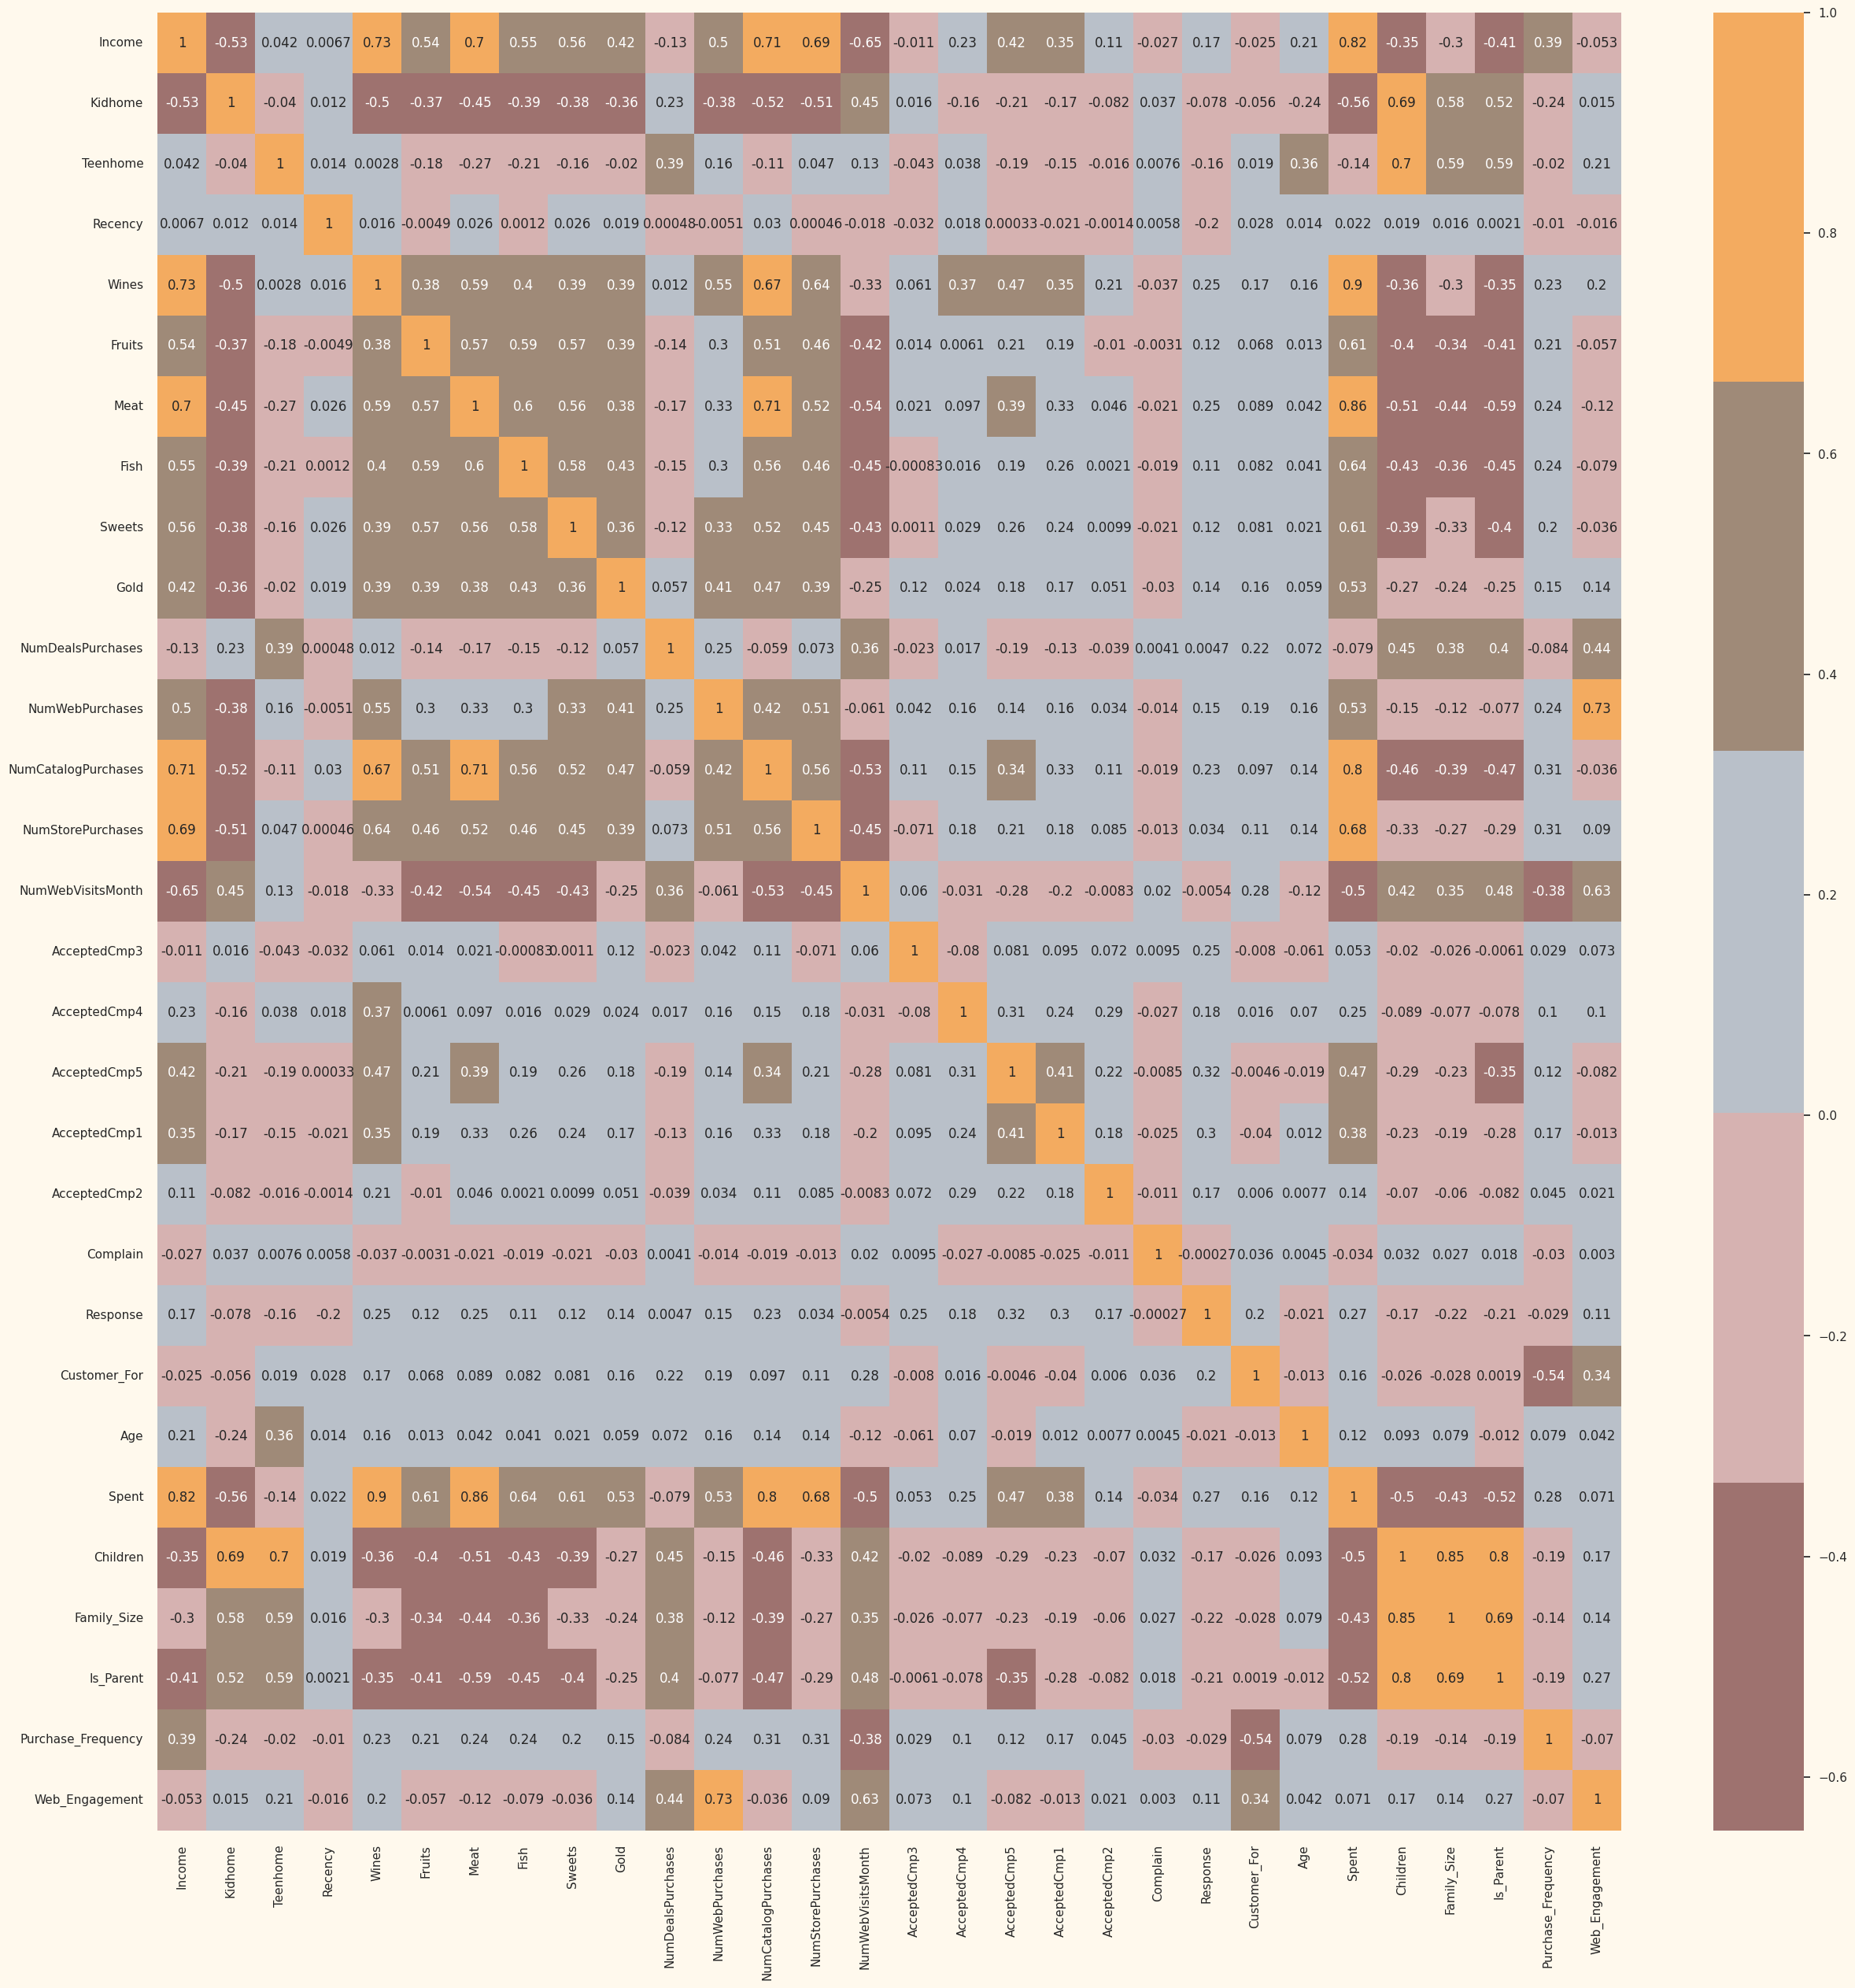

In [ ]:
#Matriz de correlación
corrmat= df.drop(columns='ID').corr(numeric_only=True)
plt.figure(figsize=(30,30))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

#### Análisis de la matriz de correlación

La matriz de correlación permite identificar relaciones lineales entre las variables numéricas del dataset. A continuación se destacan algunos hallazgos relevantes:

#### Correlaciones fuertes (|r| > 0.6):

- **`Spent`** muestra alta correlación con:
  - **`Wines` (0.86)**, **`Meat` (0.80)**, **`Gold` (0.69)**: estos productos son los principales contribuyentes al gasto total.
  - **`Income` (0.62)**: los ingresos se relacionan positivamente con el nivel de gasto.
  - **`Purchase_Frequency` (0.65)**: los clientes que compran con mayor frecuencia también tienden a gastar más.

- **`Children`** está fuertemente correlacionada con:
  - **`Kidhome` (0.90)** y **`Teenhome` (0.87)**: coherente con la definición de estas variables.

#### Correlaciones moderadas (0.4 < |r| < 0.6):

- **`Web_Engagement`**:
  - Positivamente correlacionada con **`NumWebPurchases` (0.73)**.
  - Negativamente correlacionada con **`NumWebVisitsMonth` (-0.44)**: sugiere que los usuarios más activos digitalmente compran más y navegan menos sin comprar.

- **`NumCatalogPurchases`** correlaciona con:
  - **`Income` (0.71)**, **`Spent` (0.68)** y **`Customer_For` (0.52)**: indica que los clientes con mayores ingresos y antigüedad tienden a usar más el canal de catálogo.

#### Correlaciones débiles o negativas:

- **`Complain`**: no muestra correlación significativa con ninguna variable, indicando que las quejas son eventos dispersos en todos los perfiles.

- **`Age`**:
  - Leve correlación negativa con **`Income` (-0.13)** y **`Spent` (-0.14)**, lo cual sugiere que los clientes más jóvenes tienden a gastar e ingresar más, aunque el efecto no es fuerte.

- **`Response`** (respuesta a la última campaña):
  - Baja correlación con todas las variables, pero destaca una moderada con **`AcceptedCmp5` (0.47)**: sugiere que quienes aceptaron campañas anteriores son más propensos a responder nuevamente.

---

**Conclusión**:  
Este análisis respalda el uso de variables como `Spent`, `Income`, `Purchase_Frequency` y `Web_Engagement` como predictores clave en modelos de segmentación o targeting. También destaca la importancia de identificar outliers y entender mejor la dinámica multicanal del cliente.


### 5. Preprocesamiento
- Codificación de variables categóricas con Label Encoding.
- Escalado de todas las variables mediante `StandardScaler` para normalizar las magnitudes.

---

In [ ]:
# 5. Codificación de variables categóricas
categorical = df.drop(columns='ID').select_dtypes(include='object').columns
print(categorical)

le = LabelEncoder()
for col in categorical:
    df[col] = le.fit_transform(df.drop(columns='ID')[col])

display(df.head())

Index(['Education', 'Living_With'], dtype='object')


ID  Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0  5524          0 58138.000        0         0       58    635      88   546   
1  2174          0 46344.000        1         1       38     11       1     6   
2  4141          0 71613.000        0         0       26    426      49   127   
3  6182          0 26646.000        1         0       26     11       4    20   
4  5324          1 58293.000        1         0       94    173      43   118   

   Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0   172      88    88                  3                8   
1     2       1     6                  2                1   
2   111      21    42                  1                8   
3    10       3     5                  2                2   
4    46      27    15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Customer_For  Age  Spent  Living_With  Children  Family_Size  Is_Parent  \
0           663   64   1617            0         0            1          0   
1           113   67     27            0         2            3          1   
2           312   56    776            1         0            2          0   
3           139   37     53            1         1            3          1   
4           161   40    422            1         1            3          1   

   Purchase_Frequency  Web_Engagement  
0               0.952              15  
1               0.839               6  
2               1.754              12  
3               1.065               8  
4               2.199              10

En esta parte se eliminan los valores nulos, principalmente en la columna `Income`, y se transforma la columna de fechas. Esto permite asegurar que los datos estén completos y estructurados correctamente para la fase de análisis posterior.

In [ ]:
# 6. Preparar datos para clustering
X = df.drop(columns=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
                     "Response", "Complain"]).set_index("ID")
display(X.head())

Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
ID                                                                           
5524          0 58138.000        0         0       58    635      88   546   
2174          0 46344.000        1         1       38     11       1     6   
4141          0 71613.000        0         0       26    426      49   127   
6182          0 26646.000        1         0       26     11       4    20   
5324          1 58293.000        1         0       94    173      43   118   

      Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
ID                                                             
5524   172      88    88                  3                8   
2174     2       1     6                  2                1   
4141   111      21    42                  1                8   
6182    10       3     5                  2                2   
5324    46      27    15                  5                5   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
ID                                                                              
5524                   10                  4                  7           663   
2174                    1                  2                  5           113   
4141                    2                 10                  4           312   
6182                    0                  4                  6           139   
5324                    3                  6                  5           161   

      Age  Spent  Living_With  Children  Family_Size  Is_Parent  \
ID                                                                
5524   64   1617            0         0            1          0   
2174   67     27            0         2            3          1   
4141   56    776            1         0            2          0   
6182   37     53            1         1            3          1   
5324   40    422            1         1            3          1   

      Purchase_Frequency  Web_Engagement  
ID                                        
5524               0.952              15  
2174               0.839               6  
4141               1.754              12  
6182               1.065               8  
5324               2.199              10

In [ ]:
# 7. Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).set_index(df['ID'])
display(X_scaled.head())

Education  Income  Kidhome  Teenhome  Recency  Wines  Fruits   Meat  \
ID                                                                          
5524     -0.892   0.315   -0.823    -0.931    0.311  0.975   1.549  1.748   
2174     -0.892  -0.255    1.039     0.907   -0.381 -0.875  -0.639 -0.732   
4141     -0.892   0.965   -0.823    -0.931   -0.795  0.355   0.568 -0.176   
6182     -0.892  -1.206    1.039    -0.931   -0.795 -0.875  -0.563 -0.667   
5324      0.572   0.322    1.039    -0.931    1.555 -0.395   0.417 -0.217   

       Fish  Sweets   Gold  NumDealsPurchases  NumWebPurchases  \
ID                                                               
5524  2.449   1.480  0.850              0.361            1.425   
2174 -0.652  -0.635 -0.736             -0.169           -1.133   
4141  1.336  -0.149 -0.040             -0.699            1.425   
6182 -0.506  -0.587 -0.755             -0.169           -0.768   
5324  0.150  -0.003 -0.562              1.422            0.329   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
ID                                                                              
5524                2.629             -0.563              0.689         1.527   
2174               -0.588             -1.180             -0.140        -1.189   
4141               -0.231              1.289             -0.554        -0.206   
6182               -0.945             -0.563              0.275        -1.060   
5324                0.127              0.054             -0.140        -0.952   

        Age  Spent  Living_With  Children  Family_Size  Is_Parent  \
ID                                                                  
5524  1.017  1.679       -1.348    -1.267       -1.759     -1.585   
2174  1.274 -0.964       -1.348     1.403        0.449      0.631   
4141  0.334  0.281        0.742    -1.267       -0.655     -1.585   
6182 -1.290 -0.921        0.742     0.068        0.449      0.631   
5324 -1.034 -0.307        0.742     0.068        0.449      0.631   

      Purchase_Frequency  Web_Engagement  
ID                                        
5524              -0.301           1.573  
2174              -0.356          -0.972  
4141               0.091           0.725  
6182              -0.246          -0.407  
5324               0.308           0.159

### 6. Reducción de dimensionalidad
- Aplicación de **PCA (Análisis de Componentes Principales)** para reducir el espacio a 3 dimensiones, conservando la mayor varianza posible.

---

Antes de aplicar clustering, se estandarizan las variables y se aplica PCA para reducir la dimensionalidad. Esto ayuda a eliminar redundancias y facilita la visualización tridimensional de los clusters resultantes.

In [ ]:
# 8. Reducción de dimensiones
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"]).set_index(df['ID'])
display(X_pca_df.head())

PC1    PC2    PC3
ID                       
5524  4.877  0.949  3.049
2174 -2.849 -0.695 -1.794
4141  2.602 -0.266  0.554
6182 -2.670 -1.568 -0.162
5324 -0.595  0.208 -0.396

In [ ]:
X_pca_df.describe().T

count  mean   std    min    25%    50%   75%   max
PC1 2205.000 0.000 2.926 -6.193 -2.596 -0.806 2.421 7.429
PC2 2205.000 0.000 1.819 -4.429 -1.408 -0.264 1.295 6.616
PC3 2205.000 0.000 1.434 -5.493 -0.957  0.017 1.002 6.597

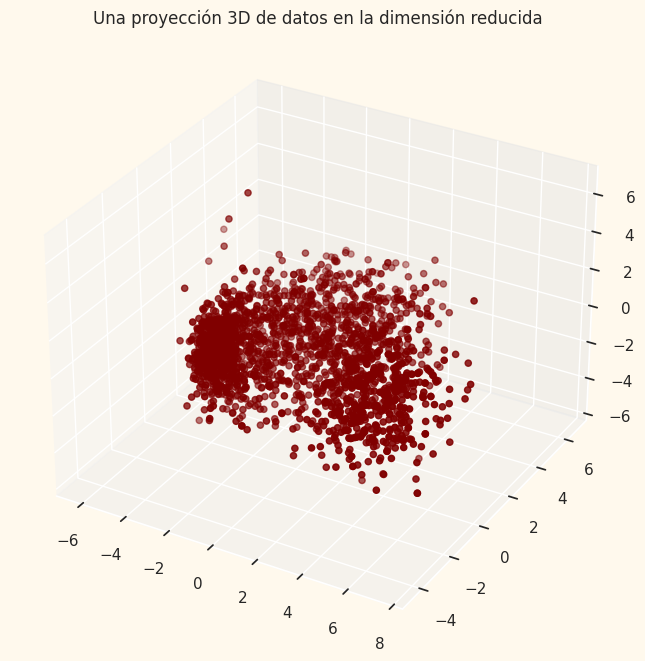

In [ ]:
x_plot =X_pca_df["PC1"]
y_plot =X_pca_df["PC2"]
z_plot =X_pca_df["PC3"]

#Graficar
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x_plot,y_plot,z_plot, c="maroon", marker="o" )
ax.set_title("Una proyección 3D de datos en la dimensión reducida")
plt.show()

### 7. Aplicación de algoritmos de clustering (aprendizaje no supervisado)
- Determinación del número óptimo de clusters usando el **coeficiente de Silhouette**.
- Comparación de modelos:
  - KMeans
  - Clustering Jerárquico (Agglomerative)
  - Gaussian Mixture Models (GMM)
- Selección automática del mejor modelo según desempeño (Silhouette Score).

---

#### Selección del número óptimo de clusters K

Método del codo para determinar el número de clústeres a formar:


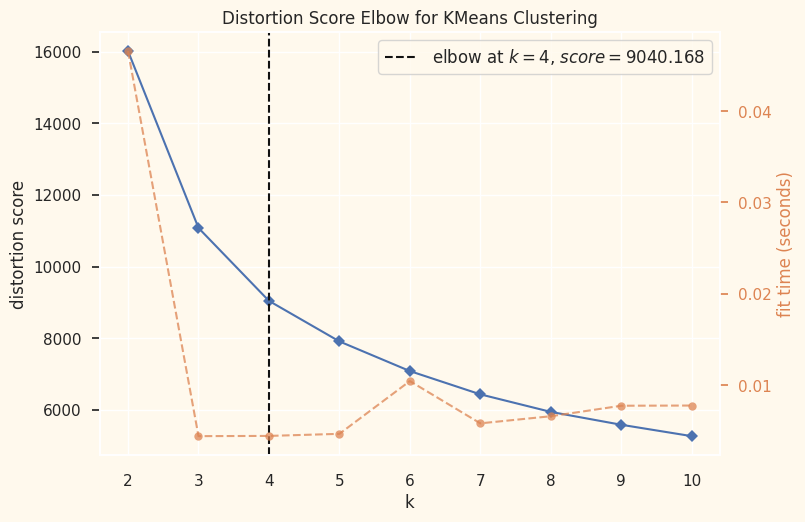

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Método del codo para determinar el número de clústeres a formar:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(X_pca_df)
best_k = Elbow_M.elbow_value_
Elbow_M.show()

##### Método del Codo para Determinación de k óptimo en KMeans

El gráfico representa el uso del **método del codo** para seleccionar el número óptimo de clústeres (`k`) al aplicar el algoritmo de KMeans.

##### Ejes:
- **Eje Y izquierdo**: muestra el **distortion score** (también conocido como inercia o suma de las distancias cuadradas dentro de cada clúster). Este valor disminuye a medida que `k` aumenta, ya que los puntos están más cerca de sus respectivos centroides.
- **Eje Y derecho**: indica el **tiempo de entrenamiento del modelo** por cada valor de `k`. En este caso, el tiempo es bajo y estable, lo cual sugiere que el modelo es eficiente computacionalmente para todos los valores probados.

##### Punto de codo:
- El **"codo"** se ubica en `k = 4`, donde la mejora en la reducción del error comienza a ser marginal.
- La inercia en ese punto es aproximadamente **9040.17**, lo que indica un buen compromiso entre compactación de clústeres y simplicidad del modelo.

---

**Conclusión**:  
Seleccionar **k = 4** como número de clústeres permite obtener una segmentación interpretable, balanceando adecuadamente entre precisión y complejidad. Este valor servirá como base para interpretar y accionar sobre los diferentes perfiles de clientes.


Aquí se comparan distintos algoritmos de clustering: **KMeans**, **Clustering Jerárquico** y **GMM**, y se elige automáticamente el mejor modelo usando el **coeficiente de Silhouette** como métrica. Este enfoque permite una segmentación robusta y basada en evidencia estadística.

In [ ]:
# 10. Comparar modelos de clustering
models = {
    "KMeans": KMeans(n_clusters=best_k, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=best_k),
    "GMM": GaussianMixture(n_components=best_k, random_state=42)
}
scores = {}
labels_dict = {}

for name, model in models.items():
    if name == "GMM":
        labels = model.fit_predict(X_pca_df)
    else:
        labels = model.fit(X_pca_df).labels_
    labels_dict[name] = labels
    score = silhouette_score(X_pca_df, labels)
    scores[name] = score
    print(f"{name} Silhouette Score: {score}")

KMeans Silhouette Score: 0.35255390773484746
Agglomerative Silhouette Score: 0.3073304133267688
GMM Silhouette Score: 0.2945515279426297


In [ ]:
# 11. Añadir los clusters al DataFrame original
best_model_name = max(scores, key=scores.get)
df_cluster_label = pd.DataFrame(labels_dict[best_model_name], index=X.index, columns=["Cluster"])
df_cluster_label.reset_index(inplace=True)
df = df.merge(df_cluster_label, on="ID")
df.head()

ID  Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0  5524          0 58138.000        0         0       58    635      88   546   
1  2174          0 46344.000        1         1       38     11       1     6   
2  4141          0 71613.000        0         0       26    426      49   127   
3  6182          0 26646.000        1         0       26     11       4    20   
4  5324          1 58293.000        1         0       94    173      43   118   

   Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0   172      88    88                  3                8   
1     2       1     6                  2                1   
2   111      21    42                  1                8   
3    10       3     5                  2                2   
4    46      27    15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Customer_For  Age  Spent  Living_With  Children  Family_Size  Is_Parent  \
0           663   64   1617            0         0            1          0   
1           113   67     27            0         2            3          1   
2           312   56    776            1         0            2          0   
3           139   37     53            1         1            3          1   
4           161   40    422            1         1            3          1   

   Purchase_Frequency  Web_Engagement  Cluster  
0               0.952              15        0  
1               0.839               6        3  
2               1.754              12        0  
3               1.065               8        1  
4               2.199              10        3

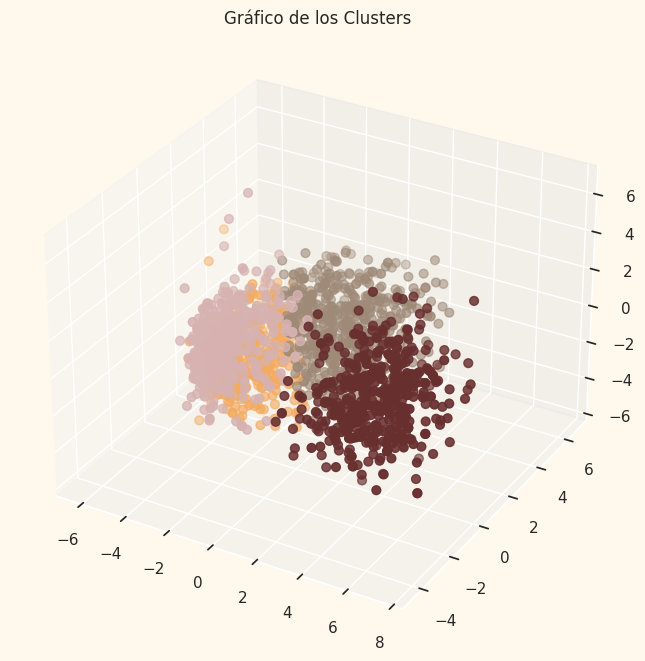

In [ ]:
#Graficar los datos por cluster
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x_plot, y_plot, z_plot, s=40, c=df["Cluster"], marker='o', cmap = cmap )
ax.set_title("Gráfico de los Clusters")
plt.show()

Esta gráfica muestra una representación tridimensional de los clústeres generados por el modelo de KMeans, utilizando las tres primeras componentes principales obtenidas con PCA (Análisis de Componentes Principales).

- Cada punto representa un cliente, posicionado según sus características reducidas a tres dimensiones principales que capturan la mayor varianza del conjunto de datos original.
- Los colores diferencian los **4 clústeres** identificados, de acuerdo al resultado del método del codo.
- La separación visual entre grupos sugiere que el modelo logra segmentar bien los patrones de comportamiento y perfil del cliente, aunque existen algunas zonas de superposición, lo cual es esperable en contextos reales.

**Interpretación**:  
La proyección 3D permite confirmar la existencia de agrupaciones distinguibles entre los clientes. Esto valida gráficamente la efectividad de la segmentación y aporta una base visual para asociar características de cada clúster con perfiles de comportamiento o marketing diferenciado.


### 8. Perfilamiento de clusters
- Asignación del número de cluster a cada cliente.
- Análisis estadístico por grupo:
  - Edad, ingreso, gasto, Spent, frecuencia, interacción digital, tamaño del hogar.
- Identificación de segmentos valiosos para acciones comerciales específicas.

---

Una vez definidos los clusters, se realiza el **perfilamiento** de cada grupo para interpretar sus características. Esto permite traducir los resultados numéricos en insights accionables para el negocio.

In [ ]:
# 12. Profiling de clusters
profiling_summary = df.groupby("Cluster")[["Age", "Income", "Spent", "Purchase_Frequency", "Web_Engagement", "Family_Size"]].mean()
profiling_summary["Count"] = df["Cluster"].value_counts()
display(profiling_summary)

Age    Income    Spent  Purchase_Frequency  Web_Engagement  \
Cluster                                                                 
0       52.854 75761.836 1368.992               2.739           7.511   
1       44.563 29822.844   98.919               0.679           8.975   
2       55.400 60634.790  875.147               1.755          12.504   
3       56.274 42856.224  141.207               1.235           8.392   

         Family_Size  Count  
Cluster                      
0              1.635    507  
1              2.388    595  
2              2.815    585  
3              3.517    518

/tmp/ipython-input-25-718998487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df["Cluster"], palette= pal)


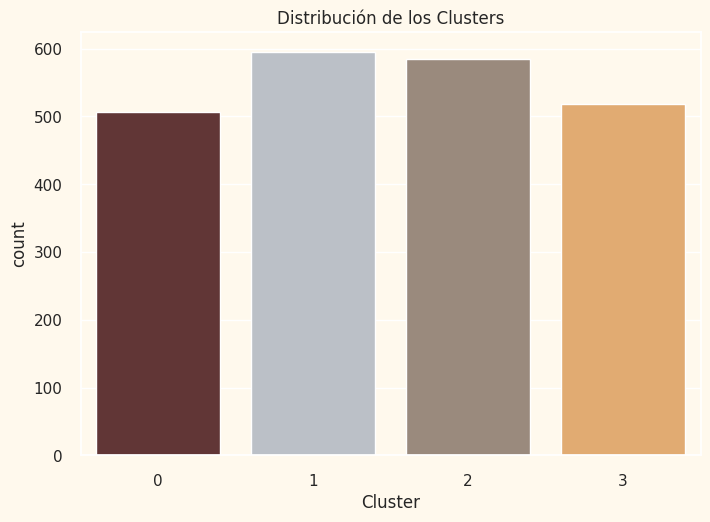

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"] #, "#D6B2B1", "#9E726F"
pl = sns.countplot(x=df["Cluster"], palette= pal)
pl.set_title("Distribución de los Clusters")
plt.show()

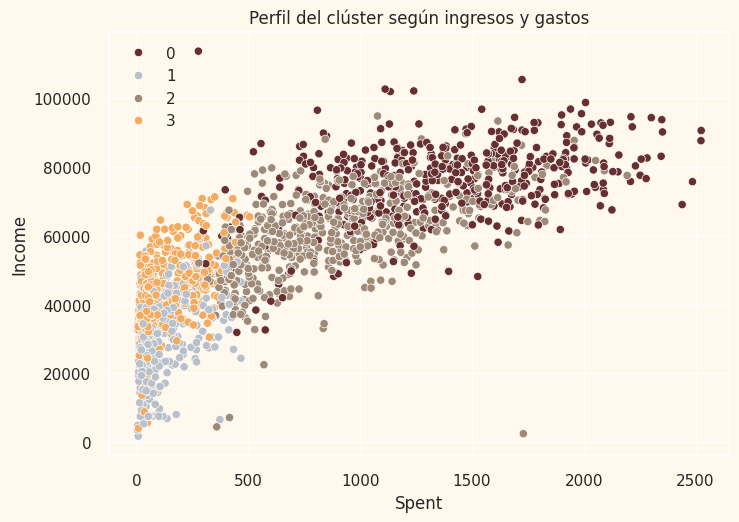

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Cluster"], palette= pal)
pl.set_title("Perfil del clúster según ingresos y gastos")
plt.legend()
plt.show()

#### Distribución de Ingresos vs Gasto por Clúster

Este scatterplot permite observar cómo se distribuyen los clientes según sus **ingresos (`Income`)** y su **gasto total (`Spent`)**, diferenciados por el clúster al que pertenecen:

##### Análisis por clúster:
- **Clúster 0** (rojo oscuro): Clientes con **mayor ingreso y mayor nivel de gasto**. Representan el grupo premium o de **alto valor** para la empresa.
- **Clúster 2** (marrón): Perfil intermedio, con **ingresos y gastos moderados**. Podrían ser familias estables con consumo racional.
- **Clúster 3** (naranja): **Ingreso intermedio pero gasto bajo**, lo que puede indicar una actitud conservadora en el consumo o restricciones familiares.
- **Clúster 1** (gris claro): Clientes con los **ingresos y gastos más bajos**, probablemente jóvenes o con bajo nivel de compromiso con la marca.

---

**Conclusión**:  
Se confirma una **correlación positiva entre ingresos y gasto**. Sin embargo, el clustering permite identificar diferencias importantes en el comportamiento de consumo incluso entre clientes con ingresos similares, lo que es clave para estrategias de marketing personalizadas y eficientes.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipython-input-27-757440413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=df["Cluster"], y=df["Spent"], palette=pal)
/usr/local/lib/python3.11/dist-packages/seaborn/cate

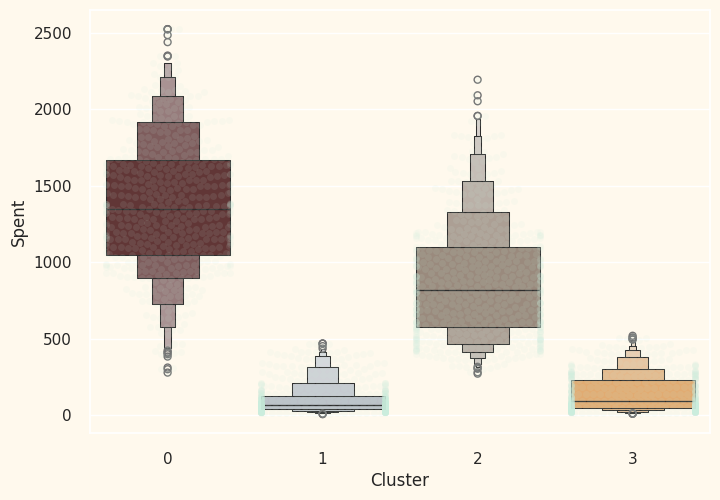

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Cluster"], y=df["Spent"], color= "#CBEDDD", alpha=0.1 )
pl=sns.boxenplot(x=df["Cluster"], y=df["Spent"], palette=pal)
plt.show()

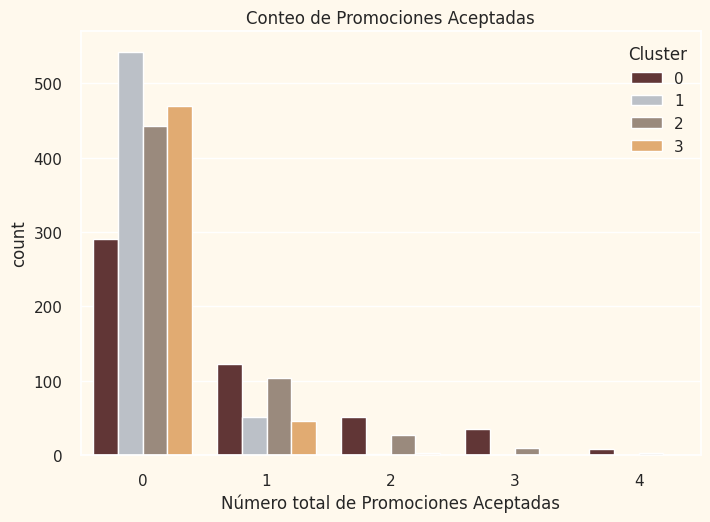

In [ ]:
#Creación de una función para obtener una suma de promociones aceptadas
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

#Recuento de gráficos de promociones aceptadas
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Cluster"], palette= pal)
pl.set_title("Conteo de Promociones Aceptadas")
pl.set_xlabel("Número total de Promociones Aceptadas")
plt.show()

/tmp/ipython-input-29-2302620064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Cluster"], palette= pal)


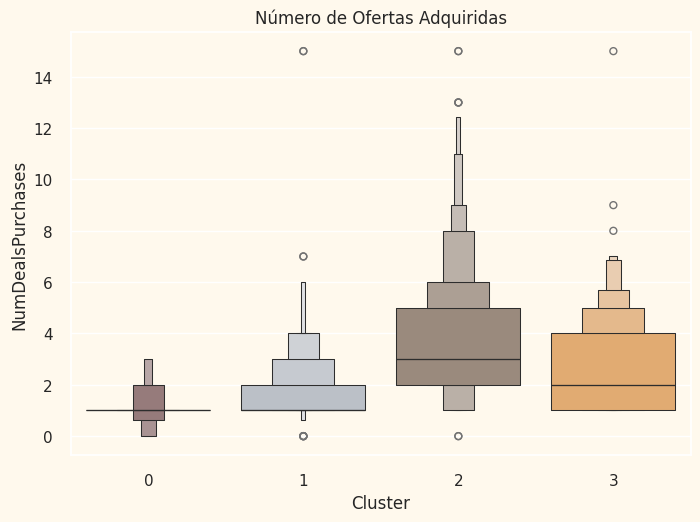

In [ ]:
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Cluster"], palette= pal)
pl.set_title("Número de Ofertas Adquiridas")
plt.show()

<Figure size 800x550 with 0 Axes>

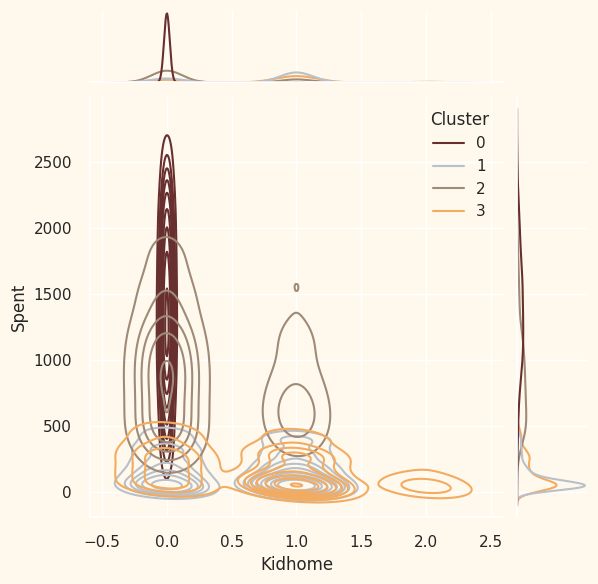

<Figure size 800x550 with 0 Axes>

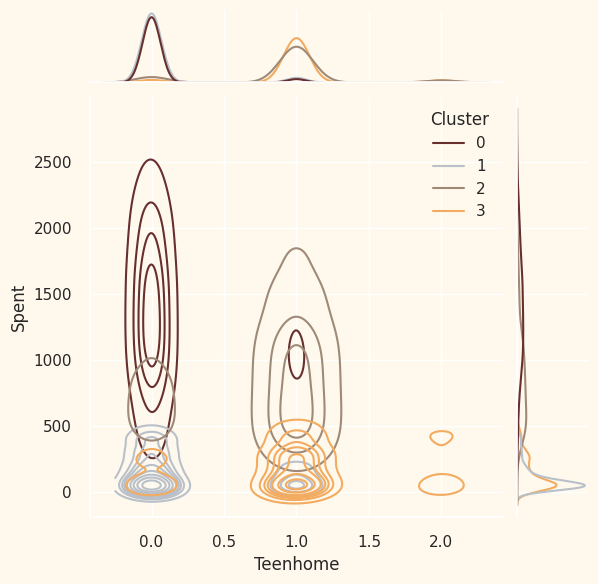

<Figure size 800x550 with 0 Axes>

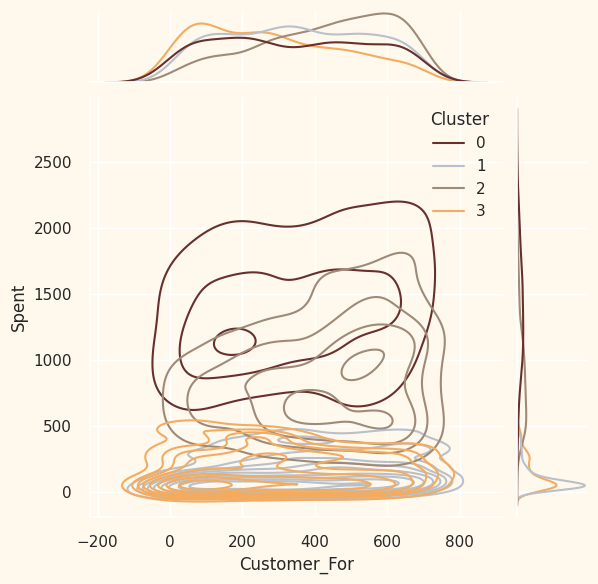

<Figure size 800x550 with 0 Axes>

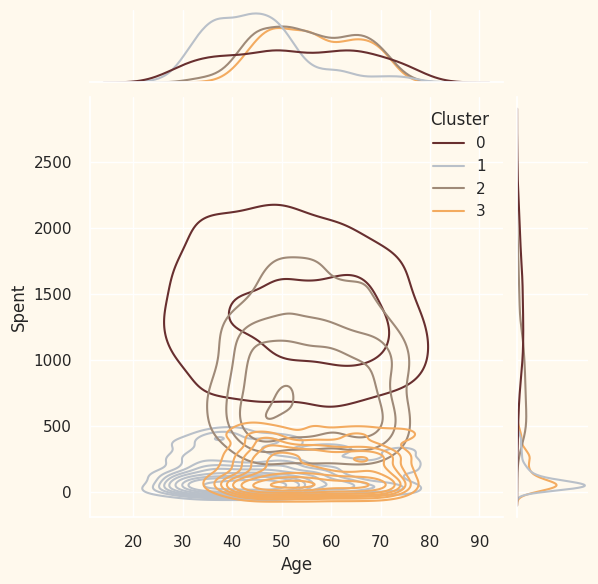

<Figure size 800x550 with 0 Axes>

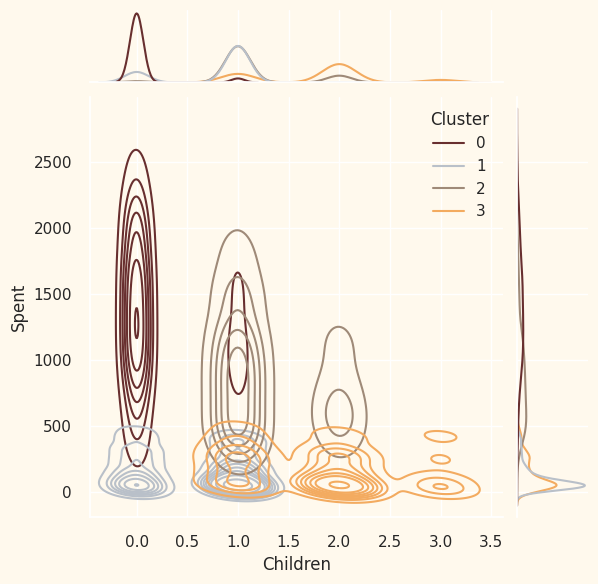

<Figure size 800x550 with 0 Axes>

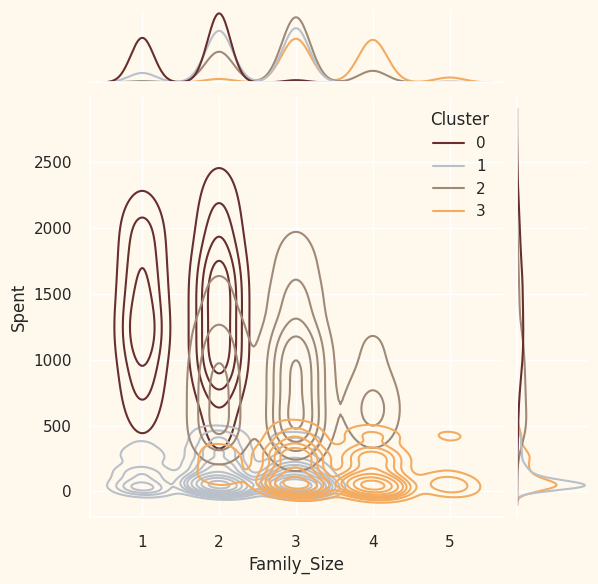

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

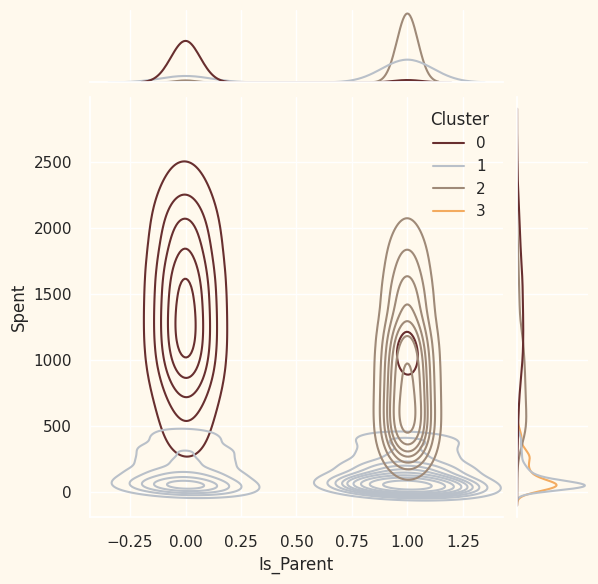

<Figure size 800x550 with 0 Axes>

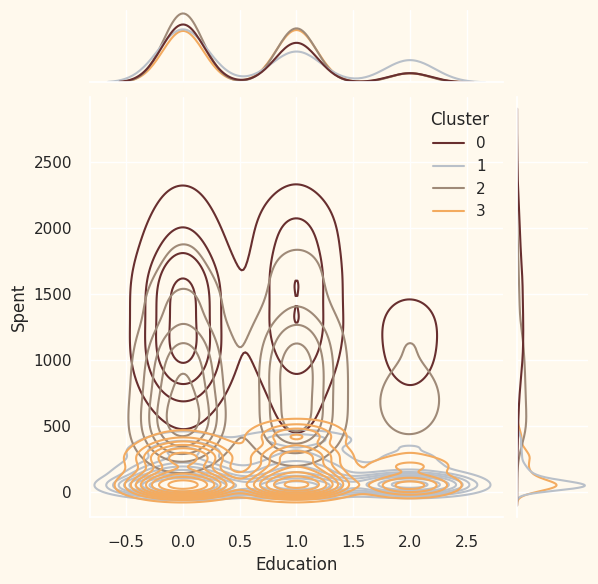

<Figure size 800x550 with 0 Axes>

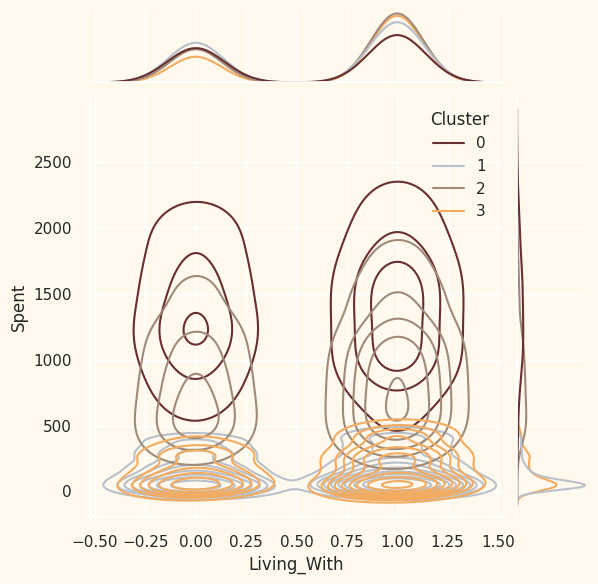

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Cluster"], kind="kde", palette=pal)
    plt.show()

Los gráficos de densidad bivariada permiten observar cómo se comporta el gasto (`Spent`) en función de distintas variables personales según el clúster de pertenencia. Se destacan las siguientes observaciones clave:

- **Kidhome y Teenhome**: Los individuos de los **clústeres 0 y 1**, en su mayoría sin hijos o con un solo hijo, tienden a presentar los niveles de gasto más altos. En contraste, los **clústeres 2 y 3**, que incluyen más padres con hijos en casa, presentan un gasto significativamente menor.

- **Customer_For (Antigüedad como cliente)**: El gasto más alto se asocia a los clientes con más años de antigüedad del **clúster 0**, lo cual sugiere una relación positiva entre lealtad y nivel de consumo.

- **Age**: Los individuos con mayor gasto (especialmente en el **clúster 0**) se concentran entre los **40 y 70 años**, mientras que los clústeres con menor gasto agrupan a personas de edad más joven o más avanzada, lo que podría estar relacionado con etapas del ciclo de vida.

- **Children y Family_Size**: Se observa que un menor número de hijos o un tamaño reducido del núcleo familiar se relacionan con un mayor gasto. Nuevamente, el **clúster 0**, mayormente sin hijos, destaca como el de mayor capacidad de consumo.

- **Is_Parent**: Los clientes que **no son padres** (`Is_Parent = 0`) muestran un comportamiento de gasto más alto, particularmente en el **clúster 0**. Esto refuerza la idea de que las responsabilidades familiares moderan el consumo.

- **Education**: El gasto tiende a concentrarse en los niveles de educación intermedios (códigos **0 y 1**), especialmente en el **clúster 0**. Sin embargo, no se aprecia una relación claramente lineal entre nivel educativo y gasto.

- **Living_With**: Aunque tanto los que viven solos como los que viven en pareja aparecen en todos los clústeres, los que **viven en pareja** muestran mayores niveles de gasto, especialmente en el **clúster 0**, lo que podría estar asociado a mayor estabilidad económica o planificación conjunta del consumo.

---

En resumen, el **clúster 0** representa al grupo con mayor capacidad de gasto, conformado principalmente por personas de mediana edad, sin hijos, sin responsabilidades parentales, y con menor tamaño familiar. En cambio, los **clústeres 2 y 3** agrupan perfiles familiares con hijos y menor gasto, posiblemente por restricciones económicas asociadas a dichas responsabilidades.


In [ ]:
df.head()

ID  Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0  5524          0 58138.000        0         0       58    635      88   546   
1  2174          0 46344.000        1         1       38     11       1     6   
2  4141          0 71613.000        0         0       26    426      49   127   
3  6182          0 26646.000        1         0       26     11       4    20   
4  5324          1 58293.000        1         0       94    173      43   118   

   Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0   172      88    88                  3                8   
1     2       1     6                  2                1   
2   111      21    42                  1                8   
3    10       3     5                  2                2   
4    46      27    15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Customer_For  Age  Spent  Living_With  Children  Family_Size  Is_Parent  \
0           663   64   1617            0         0            1          0   
1           113   67     27            0         2            3          1   
2           312   56    776            1         0            2          0   
3           139   37     53            1         1            3          1   
4           161   40    422            1         1            3          1   

   Purchase_Frequency  Web_Engagement  Cluster  Total_Promos  
0               0.952              15        0             0  
1               0.839               6        3             0  
2               1.754              12        0             0  
3               1.065               8        1             0  
4               2.199              10        3             0

In [ ]:
df_original = df_original.merge(df[["ID", "Cluster"]], on="ID", how='left')
display(df_original.head())
display(df_original.shape)
display(df_original.isna().sum())

ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.000        0         0   
1  2174        1954  Graduation         Single 46344.000        1         1   
2  4141        1965  Graduation       Together 71613.000        0         0   
3  6182        1984  Graduation       Together 26646.000        1         0   
4  5324        1981         PhD        Married 58293.000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Cluster  
0              3         11         1    0.000  
1              3         11         0    3.000  
2              3         11         0    0.000  
3              3         11         0    1.000  
4              3         11         0    3.000

(2240, 30)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Cluster                35
dtype: int64

In [ ]:
df_original['Cluster'].astype('str')

0       0.0
1       3.0
2       0.0
3       1.0
4       3.0
       ... 
2235    2.0
2236    3.0
2237    0.0
2238    2.0
2239    3.0
Name: Cluster, Length: 2240, dtype: object

In [ ]:
df_original['Cluster'] = df_original['Cluster'].astype('str')
df_original['Cluster'] = df_original['Cluster'].replace({'nan':'Atípicos'})
df_original.head()

ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.000        0         0   
1  2174        1954  Graduation         Single 46344.000        1         1   
2  4141        1965  Graduation       Together 71613.000        0         0   
3  6182        1984  Graduation       Together 26646.000        1         0   
4  5324        1981         PhD        Married 58293.000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response Cluster  
0              3         11         1     0.0  
1              3         11         0     3.0  
2              3         11         0     0.0  
3              3         11         0     1.0  
4              3         11         0     3.0

In [ ]:
df_original[df_original['Cluster']=='Atípicos'].head()

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10  1994        1983  Graduation        Married     NaN        1         0   
27  5255        1986  Graduation         Single     NaN        1         0   
43  7281        1959         PhD         Single     NaN        0         0   
48  7244        1951  Graduation         Single     NaN        2         1   
58  8557        1982  Graduation         Single     NaN        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10  15-11-2013       11         5          5                6   
27  20-02-2013       19         5          1                3   
43  05-11-2013       80        81         11               50   
48  01-01-2014       96        48          5               48   
58  17-06-2013       57        11          3               22   

    MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                0                 2             1                  1   
27                3               263           362                  0   
43                3                 2            39                  1   
48                6                10             7                  3   
58                2                 2             6                  2   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
10                1                    0                  2   
27               27                    0                  0   
43                1                    3                  4   
48                2                    1                  4   
58                2                    0                  3   

    NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
10                  7             0             0             0             0   
27                  1             0             0             0             0   
43                  2             0             0             0             0   
48                  6             0             0             0             0   
58                  6             0             0             0             0   

    AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response   Cluster  
10             0         0              3         11         0  Atípicos  
27             0         0              3         11         0  Atípicos  
43             0         0              3         11         0  Atípicos  
48             0         0              3         11         0  Atípicos  
58             0         0              3         11         0  Atípicos

### 9. Criterio de "Valor Test" (VT)

#### ¿Qué es el Valor Test?

El **Valor Test (VT)** es un criterio estadístico utilizado comúnmente en análisis exploratorios de datos, especialmente en contextos de caracterización de grupos, como en técnicas de clustering o en nodos de árboles de decisión.

Este criterio permite evaluar qué tan representativa es una variable (continua o categórica) en un grupo específico comparado con el conjunto total. Se utiliza para destacar las variables que más caracterizan a cada grupo de observaciones.

---

#### Fundamento

Para una variable dada, se compara el valor de una estadística descriptiva (media o proporción) en todo el conjunto de datos con el valor correspondiente dentro de un subgrupo. El resultado se interpreta como una prueba de significancia estadística: si el valor absoluto del VT supera 2, se considera significativo a un nivel del 5%.

---

#### Fórmulas

##### 1. Variable Continua

Dado:

- \( n \): número total de observaciones  
- \( n_g \): tamaño del grupo  
- \( \mu \): media total de la variable \( X \)  
- \( \mu_g \): media de la variable en el grupo  
- \( \sigma^2 \): varianza muestral de \( X \)  

El valor test se calcula como:

$$
t_c = \frac{\mu_g - \mu}{\sqrt{\frac{n - n_g}{n - 1} \cdot \frac{\sigma^2}{n_g}}}
$$
---

##### 2. Variable Categórica (Discreta)

Dado:

- \( n \): tamaño total de la muestra  
- \( n_g \): tamaño del grupo  
- \( n_j \): cantidad de individuos en la categoría \( j \)  
- \( n_{jg} \): cantidad de individuos en la categoría \( j \) dentro del grupo  


El valor test se calcula como:

$$
t_d = \frac{n_{jg} - \frac{n_g \cdot n_j}{n}}{\sqrt{ \frac{n - n_g}{n - 1} \cdot \left(1 - \frac{n_j}{n} \right) \cdot \frac{n_g \cdot n_j}{n}} }
$$

---

##### Interpretación

- **Valores altos** (positivos o negativos) indican que la media o proporción en ese grupo es significativamente distinta al total, por lo tanto, esa variable **caracteriza al grupo**.
- Se utiliza principalmente para **ordenar variables** y detectar aquellas que tienen un **peso explicativo mayor** en la diferenciación entre grupos.
- No se recomienda usar un umbral fijo de significancia como criterio absoluto, sino utilizarlo como un método comparativo o de **ranking de variables**.


In [ ]:
# Definiendo las funciones proporcionadas por el usuario

def test_value_continuous(group_mean, overall_mean, empirical_variance, n_total, n_group):
    numerator = group_mean - overall_mean
    denominator = np.sqrt(((n_total-n_group)/(n_total-1))*(empirical_variance/n_group))
    test_value = numerator / denominator
    return test_value

def test_value_categorical(n_ij, n_j, n_group, n_total):
    expected = (n_group * n_j) / n_total
    numerator = n_ij - expected
    denominator = np.sqrt(((n_total - n_group)/(n_total-1))  * (1 - (n_j / n_total)) * ((n_group * n_j) / n_total))
    test_value = numerator / denominator
    return test_value

# Creación de una función que calcula los valores de prueba para un marco de datos determinado

def calculate_test_values(df, inputs, target):
    results = []
    n_total = len(df)
    groups = df[target].unique()

    for group in groups:
        df_group = df[df[target] == group]
        n_group = len(df_group)

        for input in inputs:
            if pd.api.types.is_numeric_dtype(df[input]):
                # Variable continua
                type = 'continuos'
                group_mean = df_group[input].mean()
                overall_mean = df[input].mean()
                empirical_variance = df[input].var(ddof=1)  # ddof=1 para obtener la varianza de la muestra
                group_empirical_variance = df_group[input].var(ddof=1)
                test_value = test_value_continuous(group_mean, overall_mean, empirical_variance, n_total, n_group)
                recall_accuracy = None  # Marcador de posición, ya que el cálculo no está definido
            else:
                # Variable categórica
                value_counts = df[input].value_counts()
                group_value_counts = df_group[input].value_counts()

                for category in value_counts.index:
                    type = 'categorical'
                    n_ij = group_value_counts.get(category, 0)

                    n_j = value_counts[category]

                    test_value = test_value_categorical(n_ij, n_j, n_group, n_total)

                    group_accuracy = n_ij / n_group if n_group != 0 else 0
                    recall = n_ij / n_j if n_j != 0 else 0
                    frecuency = n_j / n_total if n_total != 0 else 0
                    results.append({
                        'Type' : type,
                        'Attribute': input,
                        'Category': category,
                        'Group': group,
                        'Test Value': test_value,
                        'Recall': recall,
                        'Group Accuracy': group_accuracy,
                        'Overall Accuracy': frecuency,
                        'Group Count': n_ij,
                        'Total Count': n_j
                    })
                continue

            results.append({
                'Type' : type,
                'Attribute': input,
                'Group': group,
                'Test Value': test_value,
                'Recall Accuracy': recall_accuracy,
                'Group Mean': group_mean,
                'Overall Mean': overall_mean,
                'Group Standard Deviation':np.sqrt(group_empirical_variance),
                'Overall Standard Deviation': np.sqrt(empirical_variance)
            })

    results_df = pd.DataFrame(results)

    if results_df['Type'].nunique()==2:
        results_df = results_df[['Group','Type', 'Attribute', 'Category', 'Test Value'
                                 , 'Group Mean', 'Overall Mean', 'Group Standard Deviation', 'Overall Standard Deviation'
                                 ,'Recall', 'Group Accuracy', 'Overall Accuracy']].sort_values(by=['Type','Test Value', 'Group'],ascending=[False, False, True])

    elif results_df['Type'].unique()=='continuos':
        results_df = results_df[['Group','Type', 'Attribute','Test Value'
                                 ,'Group Mean', 'Overall Mean', 'Group Standard Deviation', 'Overall Standard Deviation']].sort_values(by=['Type','Test Value', 'Group'],ascending=[False,False,True])

    else:
        results_df = results_df[['Group','Type', 'Attribute', 'Category','Test Value'
                                 ,'Recall', 'Group Accuracy', 'Overall Accuracy']].sort_values(by=['Type','Test Value', 'Group'],ascending=[False, False, True])


    return results_df

In [ ]:
df_original['Cluster'].value_counts()

Cluster
1.0         595
2.0         585
3.0         518
0.0         507
Atípicos     35
Name: count, dtype: int64

In [ ]:
inputs = df_original.drop(columns=['Cluster','ID']+to_drop).columns
target = 'Cluster'

display(to_drop)

# Calcular el Test Value
test_value = calculate_test_values(df_original, inputs, target)

['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth']

##### Resultado de Test Value

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

for i in test_value['Group'].unique():
    print('\n')
    print('Cluster '+str(i))
    display(test_value[(test_value['Group']==i)&(test_value['Test Value'].abs()>=2)])



Cluster 0.0


Group         Type            Attribute    Category  Test Value  \
11   0.0    continuos      MntMeatProducts         NaN     33.1689   
17   0.0    continuos  NumCatalogPurchases         NaN     28.0170   
12   0.0    continuos      MntFishProducts         NaN     27.9710   
10   0.0    continuos            MntFruits         NaN     25.4904   
13   0.0    continuos     MntSweetProducts         NaN     25.2193   
5    0.0    continuos               Income         NaN     23.9074   
9    0.0    continuos             MntWines         NaN     22.7736   
18   0.0    continuos    NumStorePurchases         NaN     20.0679   
22   0.0    continuos         AcceptedCmp5         NaN     19.0617   
23   0.0    continuos         AcceptedCmp1         NaN     15.7229   
14   0.0    continuos         MntGoldProds         NaN     15.2909   
26   0.0    continuos             Response         NaN     10.9672   
16   0.0    continuos      NumWebPurchases         NaN      7.7390   
21   0.0    continuos         AcceptedCmp4         NaN      4.6500   
24   0.0    continuos         AcceptedCmp2         NaN      4.0436   
15   0.0    continuos    NumDealsPurchases         NaN    -16.8450   
6    0.0    continuos              Kidhome         NaN    -20.8343   
7    0.0    continuos             Teenhome         NaN    -21.4765   
19   0.0    continuos    NumWebVisitsMonth         NaN    -28.8007   
0    0.0  categorical            Education  Graduation      2.0107   
4    0.0  categorical            Education       Basic     -4.0226   

    Group Mean  Overall Mean  Group Standard Deviation  \
11    459.4734      166.9500                  235.6964   
17      5.8619        2.6621                    2.3751   
12     97.2288       37.5254                   65.3170   
10     65.9152       26.3022                   50.7021   
13     67.7396       27.0629                   51.6867   
5   75761.8363    52247.2514                10840.2153   
9     603.4458      303.9357                  316.3637   
18      8.3393        5.7902                    2.8059   
22      0.2663        0.0728                    0.4424   
23      0.2150        0.0643                    0.4112   
14     75.1893       44.0219                   61.0388   
26      0.3018        0.1491                    0.4595   
16      4.9250        4.0848                    2.1883   
21      0.1223        0.0746                    0.3279   
24      0.0316        0.0134                    0.1750   
15      1.0533        2.3250                    0.4737   
6       0.0059        0.4442                    0.0768   
7       0.0493        0.5062                    0.2167   
19      2.5858        5.3165                    1.6340   
0          NaN           NaN                       NaN   
4          NaN           NaN                       NaN   

    Overall Standard Deviation  Recall  Group Accuracy  Overall Accuracy  
11                    225.7154     NaN             NaN               NaN  
17                      2.9231     NaN             NaN               NaN  
12                     54.6290     NaN             NaN               NaN  
10                     39.7734     NaN             NaN               NaN  
13                     41.2805     NaN             NaN               NaN  
5                   25173.0767     NaN             NaN               NaN  
9                     336.5974     NaN             NaN               NaN  
18                      3.2510     NaN             NaN               NaN  
22                      0.2598     NaN             NaN               NaN  
23                      0.2453     NaN             NaN               NaN  
14                     52.1674     NaN             NaN               NaN  
26                      0.3563     NaN             NaN               NaN  
16                      2.7787     NaN             NaN               NaN  
21                      0.2627     NaN             NaN               NaN  
24                      0.1150     NaN             NaN      



Cluster Atípicos


Group       Type            Attribute Category  Test Value  \
113  Atípicos  continuos               Income      NaN     29.6774   
119  Atípicos  continuos      MntMeatProducts      NaN      2.7255   
125  Atípicos  continuos  NumCatalogPurchases      NaN      2.1460   
134  Atípicos  continuos             Response      NaN     -2.0169   
124  Atípicos  continuos      NumWebPurchases      NaN     -2.1435   
117  Atípicos  continuos             MntWines      NaN     -2.4870   
127  Atípicos  continuos    NumWebVisitsMonth      NaN     -3.1641   
126  Atípicos  continuos    NumStorePurchases      NaN     -3.8591   

     Group Mean  Overall Mean  Group Standard Deviation  \
113 177562.7273    52247.2514               168647.5098   
119    270.1429      166.9500                  518.9568   
125      3.7143        2.6621                    7.3347   
134      0.0286        0.1491                    0.1690   
124      3.0857        4.0848                    4.6550   
117    163.5143      303.9357                  238.4068   
127      4.0286        5.3165                    2.9052   
126      3.6857        5.7902                    3.1787   

     Overall Standard Deviation  Recall  Group Accuracy  Overall Accuracy  
113                  25173.0767     NaN             NaN               NaN  
119                    225.7154     NaN             NaN               NaN  
125                      2.9231     NaN             NaN               NaN  
134                      0.3563     NaN             NaN               NaN  
124                      2.7787     NaN             NaN               NaN  
117                    336.5974     NaN             NaN               NaN  
127                      2.4266     NaN             NaN               NaN  
126                      3.2510     NaN             NaN               NaN



Cluster 2.0


Group         Type            Attribute  Category  Test Value  Group Mean  \
97    2.0    continuos      NumWebPurchases       NaN     27.2814      6.7795   
88    2.0    continuos             Teenhome       NaN     21.5344      0.9231   
99    2.0    continuos    NumStorePurchases       NaN     20.4393      8.1521   
96    2.0    continuos    NumDealsPurchases       NaN     19.5837      3.6701   
90    2.0    continuos             MntWines       NaN     18.4465    524.6444   
95    2.0    continuos         MntGoldProds       NaN     13.6027     69.2462   
98    2.0    continuos  NumCatalogPurchases       NaN      9.4711      3.6462   
86    2.0    continuos               Income       NaN      9.3736  60634.7897   
102   2.0    continuos         AcceptedCmp4       NaN      6.8431      0.1385   
100   2.0    continuos    NumWebVisitsMonth       NaN      4.7331      5.7248   
94    2.0    continuos     MntSweetProducts       NaN      3.9226     32.8188   
91    2.0    continuos            MntFruits       NaN      3.9032     31.8205   
93    2.0    continuos      MntFishProducts       NaN      2.5006     42.3812   
103   2.0    continuos         AcceptedCmp5       NaN     -3.0668      0.0444   
87    2.0    continuos              Kidhome       NaN    -11.8665      0.2171   
82    2.0  categorical            Education       PhD      2.5756         NaN   
84    2.0  categorical            Education  2n Cycle     -2.1803         NaN   
85    2.0  categorical            Education     Basic     -4.1081         NaN   

     Overall Mean  Group Standard Deviation  Overall Standard Deviation  \
97         4.0848                    2.4913                      2.7787   
88         0.5062                    0.4087                      0.5445   
99         5.7902                    2.7825                      3.2510   
96         2.3250                    2.3450                      1.9322   
90       303.9357                  298.3814                    336.5974   
95        44.0219                   56.3260                     52.1674   
98         2.6621                    2.3993                      2.9231   
86     52247.2514                11687.9038                  25173.0767   
102        0.0746                    0.3457                      0.2627   
100        5.3165                    1.8332                      2.4266   
94        27.0629                   39.7511                     41.2805   
91        26.3022                   37.3322                     39.7734   
93        37.5254                   50.0541                     54.6290   
103        0.0728                    0.2063                      0.2598   
87         0.4442                    0.4249                      0.5384   
82            NaN                       NaN                         NaN   
84            NaN                       NaN                         NaN   
85            NaN                       NaN                         NaN   

     Recall  Group Accuracy  Overall Accuracy  
97      NaN             NaN               NaN  
88      NaN             NaN               NaN  
99      NaN             NaN               NaN  
96      NaN             NaN               NaN  
90      NaN             NaN               NaN  
95      NaN             NaN               NaN  
98      NaN             NaN               NaN  
86      NaN             NaN               NaN  
102     NaN             NaN               NaN  
100     NaN             NaN               NaN  
94      NaN             NaN               NaN  
91      NaN             NaN               NaN  
93      NaN             NaN               NaN  
103     NaN             NaN               NaN  
87      NaN             NaN               NaN  
82   0.3066          0.2547            0.2170  
84   0.1970          0.0684            0.0906  
85   0.0185          0.0017            0.0241



Cluster 3.0


Group         Type            Attribute    Category  Test Value  \
34   3.0    continuos             Teenhome         NaN     23.1637   
33   3.0    continuos              Kidhome         NaN     17.2996   
46   3.0    continuos    NumWebVisitsMonth         NaN      6.1122   
42   3.0    continuos    NumDealsPurchases         NaN      4.3988   
47   3.0    continuos         AcceptedCmp3         NaN     -2.0621   
51   3.0    continuos         AcceptedCmp2         NaN     -2.1515   
48   3.0    continuos         AcceptedCmp4         NaN     -3.9319   
50   3.0    continuos         AcceptedCmp1         NaN     -6.1882   
53   3.0    continuos             Response         NaN     -6.6428   
49   3.0    continuos         AcceptedCmp5         NaN     -7.2687   
32   3.0    continuos               Income         NaN     -9.6817   
40   3.0    continuos     MntSweetProducts         NaN    -14.2310   
41   3.0    continuos         MntGoldProds         NaN    -14.2938   
37   3.0    continuos            MntFruits         NaN    -14.3268   
43   3.0    continuos      NumWebPurchases         NaN    -14.7656   
39   3.0    continuos      MntFishProducts         NaN    -14.9335   
38   3.0    continuos      MntMeatProducts         NaN    -15.8741   
45   3.0    continuos    NumStorePurchases         NaN    -15.9091   
44   3.0    continuos  NumCatalogPurchases         NaN    -16.3674   
36   3.0    continuos             MntWines         NaN    -17.0988   
29   3.0  categorical            Education      Master      3.1622   
28   3.0  categorical            Education         PhD      2.2624   
27   3.0  categorical            Education  Graduation     -2.4669   
31   3.0  categorical            Education       Basic     -3.4257   

    Group Mean  Overall Mean  Group Standard Deviation  \
34      0.9923        0.5062                    0.3109   
33      0.8031        0.4442                    0.5596   
46      5.8880        5.3165                    1.9259   
42      2.6525        2.3250                    1.6767   
47      0.0521        0.0728                    0.2225   
51      0.0039        0.0134                    0.0621   
48      0.0347        0.0746                    0.1833   
50      0.0058        0.0643                    0.0760   
53      0.0579        0.1491                    0.2338   
49      0.0000        0.0728                    0.0000   
32  42856.2239    52247.2514                11947.9930   
40      4.4266       27.0629                    7.7273   
41     15.2896       44.0219                   16.6327   
37      4.3456       26.3022                    7.5162   
43      2.5039        4.0848                    1.5232   
39      6.0907       37.5254                    9.6651   
38     28.8880      166.9500                   28.4723   
45      3.7973        5.7902                    1.5119   
44      0.8185        2.6621                    0.9235   
36     82.1660      303.9357                   86.4209   
29         NaN           NaN                       NaN   
28         NaN           NaN                       NaN   
27         NaN           NaN                       NaN   
31         NaN           NaN                       NaN   

    Overall Standard Deviation  Recall  Group Accuracy  Overall Accuracy  
34                      0.5445     NaN             NaN               NaN  
33                      0.5384     NaN             NaN               NaN  
46                      2.4266     NaN             NaN               NaN  
42                      1.9322     NaN             NaN               NaN  
47                      0.2598     NaN             NaN               NaN  
51                      0.1150     NaN             NaN               NaN  
48                      0.2627     NaN             NaN               NaN  
50                      0.2453     NaN             NaN               NaN  
53                      0.3563     NaN             NaN               NaN  
49                      0.2598     NaN             



Cluster 1.0


Group         Type            Attribute  Category  Test Value  Group Mean  \
73   1.0    continuos    NumWebVisitsMonth       NaN     17.6337      6.8202   
60   1.0    continuos              Kidhome       NaN     14.6313      0.7210   
80   1.0    continuos             Response       NaN     -2.9157      0.1126   
78   1.0    continuos         AcceptedCmp2       NaN     -3.3149      0.0000   
77   1.0    continuos         AcceptedCmp1       NaN     -7.2625      0.0017   
75   1.0    continuos         AcceptedCmp4       NaN     -7.5293      0.0050   
76   1.0    continuos         AcceptedCmp5       NaN     -7.9704      0.0000   
69   1.0    continuos    NumDealsPurchases       NaN     -8.0787      1.7765   
67   1.0    continuos     MntSweetProducts       NaN    -14.0430      6.6924   
64   1.0    continuos            MntFruits       NaN    -14.0885      6.6118   
66   1.0    continuos      MntFishProducts       NaN    -14.2863     10.1008   
68   1.0    continuos         MntGoldProds       NaN    -14.2997     17.8084   
65   1.0    continuos      MntMeatProducts       NaN    -17.9407     24.6521   
70   1.0    continuos      NumWebPurchases       NaN    -19.7679      2.1546   
71   1.0    continuos  NumCatalogPurchases       NaN    -20.9423      0.5109   
63   1.0    continuos             MntWines       NaN    -22.9019     33.0538   
72   1.0    continuos    NumStorePurchases       NaN    -23.0708      3.1546   
61   1.0    continuos             Teenhome       NaN    -23.1193      0.0639   
59   1.0    continuos               Income       NaN    -25.3505  29822.8437   
58   1.0  categorical            Education     Basic     11.4304         NaN   
57   1.0  categorical            Education  2n Cycle      3.3451         NaN   
55   1.0  categorical            Education       PhD     -5.0005         NaN   

    Overall Mean  Group Standard Deviation  Overall Standard Deviation  \
73        5.3165                    1.9314                      2.4266   
60        0.4442                    0.4600                      0.5384   
80        0.1491                    0.3164                      0.3563   
78        0.0134                    0.0000                      0.1150   
77        0.0643                    0.0410                      0.2453   
75        0.0746                    0.0709                      0.2627   
76        0.0728                    0.0000                      0.2598   
69        2.3250                    1.2642                      1.9322   
67       27.0629                    9.4012                     41.2805   
64       26.3022                    9.2496                     39.7734   
66       37.5254                   17.1256                     54.6290   
68       44.0219                   23.1030                     52.1674   
65      166.9500                   27.8431                    225.7154   
70        4.0848                    1.3925                      2.7787   
71        2.6621                    0.7506                      2.9231   
63      303.9357                   49.2148                    336.5974   
72        5.7902                    1.1084                      3.2510   
61        0.5062                    0.2447                      0.5445   
59    52247.2514                10622.7275                  25173.0767   
58           NaN                       NaN                         NaN   
57           NaN                       NaN                         NaN   
55           NaN                       NaN                         NaN   

    Recall  Group Accuracy  Overall Accuracy  
73     NaN             NaN               NaN  
60     NaN             NaN               NaN  
80     NaN             NaN               NaN  
78     NaN             NaN               NaN  
77     NaN             NaN               NaN  
75     NaN             NaN               NaN  
76     NaN             NaN               NaN  
69     NaN             NaN               NaN  
67     NaN             NaN          

In [ ]:
df_original.head()

ID  Year_Birth   Education Marital_Status     Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single 58138.0000        0         0   
1  2174        1954  Graduation         Single 46344.0000        1         1   
2  4141        1965  Graduation       Together 71613.0000        0         0   
3  6182        1984  Graduation       Together 26646.0000        1         0   
4  5324        1981         PhD        Married 58293.0000        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response Cluster  
0              3         11         1     0.0  
1              3         11         0     3.0  
2              3         11         0     0.0  
3              3         11         0     1.0  
4              3         11         0     3.0

### 10. Interpretación Final de Clusters según Test Value y Perfilado

A continuación, se describe cada clúster integrando las estadísticas descriptivas con los valores de test value, que indican qué variables son significativamente diferentes en cada grupo respecto al promedio general:

---

#### Clúster 0 – Alto poder adquisitivo y engagement moderado

- **Edad e ingresos:** Personas de mediana edad (53 años) con los ingresos más altos del conjunto (≈ 75,700).
- **Consumo:** Son los que más gastan (≈ 1,369) y tienen alta frecuencia de compra.
- **Composición familiar:** Núcleos pequeños (1.6 personas en promedio), con casi nula presencia de hijos.
- **Comportamiento de compra:** Elevada compra de vinos, carnes, dulces y pescados. También destacan en compras por catálogo y en tienda física.
- **Engagement web:** Moderado en comparación con otros clústeres.
- **Campañas y respuesta:** Mayor tasa de aceptación de campañas promocionales y mayor respuesta general.
- **Perfil educativo:** Predomina educación intermedia (Graduation), baja proporción con estudios básicos.

**Insight:** Este clúster agrupa a clientes leales, sin hijos, con alto poder adquisitivo y hábitos de compra diversificados. Son altamente rentables y receptivos a las campañas.

---

#### Clúster 1 – Bajo ingreso, bajo consumo, alta conectividad

- **Edad e ingresos:** Más jóvenes (≈ 45 años) con los ingresos más bajos (≈ 29,800).
- **Consumo:** Gasto muy bajo (≈ 99) y baja frecuencia de compra.
- **Composición familiar:** Tamaño familiar medio (2.4), con presencia moderada de hijos.
- **Engagement web:** Curiosamente tienen el engagement web más alto, lo cual indica presencia digital activa, pero sin traducirse en compras.
- **Respuesta a campañas:** Muy baja. Casi nula aceptación de campañas promocionales.
- **Compras:** Bajos niveles en todos los tipos de productos.
- **Educación:** Muy alta presencia de personas con solo educación básica.

**Insight:** Usuarios digitales activos pero económicamente limitados. Poca efectividad de marketing tradicional; podrían requerir estrategias digitales más focalizadas y accesibles.

---

#### Clúster 2 – Familiar digital con buen gasto

- **Edad e ingresos:** Similar a clúster 0 en edad (≈ 55), ingresos medios (≈ 60,600).
- **Consumo:** Segundo grupo de mayor gasto (≈ 875), con buena frecuencia de compra.
- **Composición familiar:** Núcleo más grande que el clúster 0 (≈ 2.8), mayor proporción de hijos adolescentes.
- **Engagement web:** El más alto del conjunto (≈ 12.5).
- **Campañas:** Buena respuesta, sobre todo a campañas 4 y 5.
- **Compras:** Alto consumo de vinos y productos de lujo, así como amplia actividad en todos los canales (web, tienda, catálogo).
- **Educación:** Alta proporción de personas con PhD.

**Insight:** Clúster de familias acomodadas, conectadas digitalmente y con buen nivel de consumo. Tienen potencial para fidelización digital con promociones personalizadas y productos premium.

---

#### Clúster 3 – Hogares tradicionales con restricciones económicas

- **Edad e ingresos:** Mayores (≈ 56 años), con ingresos bajos-medios (≈ 42,800).
- **Consumo:** Muy bajo (≈ 141), con baja frecuencia de compra.
- **Composición familiar:** Núcleo más grande (≈ 3.5), alta presencia de hijos.
- **Engagement web:** Bajo.
- **Campañas:** Mínima o nula respuesta a campañas promocionales.
- **Compras:** Gastan muy poco en todas las categorías. Muy bajo consumo de vino, carne, dulces, etc.
- **Educación:** Presencia notable de personas con educación superior (PhD y Master), pero también bajo en Graduation y alto en Basic.

**Insight:** Perfil tradicional con cargas familiares y limitado margen de consumo. Bajo retorno en campañas; pueden requerir soluciones de valor, descuentos o programas de ayuda.

---

#### Clúster Atípico – Alto ingreso, bajo consumo

- **Ingresos:** Extremadamente altos (≈ 177,560), muy por encima del promedio.
- **Consumo y engagement:** Paradójicamente, bajo nivel de gasto y baja respuesta a campañas.
- **Comportamiento:** Poca interacción con canales tradicionales y digitales.

**Insight:** Puede representar casos especiales o perfiles fuera del mercado objetivo habitual. Podrían ser usuarios de nicho o con necesidades muy específicas.

## 🎯 Estrategias de Marketing por Segmento - Delizia Market

Con base en el análisis de personalidad del cliente y el perfil de clústeres generado por el modelo de clustering no supervisado, se proponen las siguientes estrategias de marketing diferenciadas para cada segmento:

---

### 🟢 Clúster 0 – Alto poder adquisitivo y engagement moderado

**Insight:** Clientes leales, sin hijos, con alto poder adquisitivo y hábitos de compra diversificados. Son altamente rentables y receptivos a las campañas.

**Estrategias:**
- Lanzar campañas premium multicanal (web + catálogo + tienda física) con beneficios exclusivos (ej. descuentos anticipados, experiencias gourmet).
- Implementar programas de fidelización con recompensas por frecuencia o gasto acumulado.
- Enviar ofertas personalizadas en categorías donde más consumen (vinos, carnes, pescados).
- Mantener contacto a través de campañas bien segmentadas con estética y lenguaje sofisticado.

---

### 🔵 Clúster 1 – Bajo ingreso, bajo consumo, alta conectividad

**Insight:** Usuarios digitales activos pero económicamente limitados. Poca efectividad de marketing tradicional; requieren estrategias digitales focalizadas.

**Estrategias:**
- Desarrollar campañas digitales con contenido educativo, recetas o consejos de ahorro, que generen engagement más que venta directa.
- Ofrecer promociones accesibles y descuentos en productos de primera necesidad.
- Incentivar la primera compra mediante cupones o envíos gratuitos.
- Activar estrategias de gamificación o sorteos online que aumenten interacción con bajo costo.

---

### 🟣 Clúster 2 – Familiar digital con buen gasto

**Insight:** Familias acomodadas, conectadas digitalmente, con alto consumo y receptivas a campañas recientes.

**Estrategias:**
- Crear bundles de productos orientados al consumo familiar (ej. cajas de productos seleccionados para el hogar).
- Enviar recomendaciones personalizadas basadas en comportamiento web y compras pasadas.
- Potenciar campañas digitales con retargeting y promociones cruzadas entre canales.
- Invitar a programas de referidos con beneficios familiares o comunitarios.

---

### 🟠 Clúster 3 – Hogares tradicionales con restricciones económicas

**Insight:** Perfil tradicional con cargas familiares y limitado margen de consumo. Bajo retorno en campañas actuales.

**Estrategias:**
- Diseñar catálogos de “productos esenciales a bajo precio” con descuentos progresivos por volumen.
- Ofrecer campañas en tienda física con ofertas dirigidas a productos básicos y familiares.
- Implementar cupones físicos en barrios o zonas de alta concentración de este grupo.
- Explorar alianzas sociales o programas de responsabilidad corporativa para apoyar a estas familias.

---

### ⚪ Clúster Atípico – Alto ingreso, bajo consumo

**Insight:** Clientes con ingresos muy altos pero bajo engagement. Posibles perfiles de nicho o con necesidades muy específicas.

**Estrategias:**
- Realizar encuestas o entrevistas cualitativas para entender sus motivaciones o barreras.
- Ofrecer servicios personalizados de alto nivel, como asesor de compras o suscripción exclusiva.
- Promover productos de edición limitada o gourmet de lujo.
- Enviar comunicaciones discretas, personalizadas y de alta exclusividad.

---

## ✅ Conclusión

Estas estrategias permiten a *Delizia Market* abandonar el enfoque de marketing masivo y adoptar un enfoque **basado en datos**, que optimiza los recursos comerciales, mejora la experiencia del cliente y maximiza el retorno de inversión publicitaria. Cada clúster requiere un trato distinto, con lenguaje, canales y beneficios acordes a sus características.


In [ ]:
df_original.to_csv('dataset_marketing_procesado_clusters.csv')